
# NLP Project 2





In [ ]:
!pip install googletrans==3.1.0a0

## 2.Cleaning & Translation

### Trustpilot Scrap

In [ ]:
import pandas as pd
import ast
import re

In [ ]:
df=pd.read_csv("content/trustpilot_clean.csv",sep=',')

In [ ]:
df.shape

(1802, 9)

In [ ]:
df['comments_dict'] = df['comments'].apply(ast.literal_eval)

In [ ]:
df.head()

name  \
0                   Peeweepaw   
1                Pinktropical   
2                      Invers   
3                   Equi-Clic   
4  Le meilleur pour mon lapin   

                                                link  \
0    https://fr.trustpilot.com/review/peeweepaw.shop   
1   https://fr.trustpilot.com/review/pinktropical.fr   
2         https://fr.trustpilot.com/review/invers.fr   
3     https://fr.trustpilot.com/review/equi-clic.com   
4  https://fr.trustpilot.com/review/www.boutique-...   

                                         description  average_score  \
0  PeeweePaw est une petite entreprise artisanale...            4.9   
1  Spécialiste du terrarium tropical. [PLANTES - ...            4.9   
2  Invers élève des vers de farine en Auvergne po...            4.9   
3  Retrouvez sur Equi-Clic plus de 40 000 référen...            4.9   
4  Le Meilleur pour mon lapin est un blog de cons...            4.9   

   number_votes                                           comments  \
0          1408  {'Paquet soignée\nLivraison rapide\nToujours s...   
1          1014                                                 {}   
2           766  {'Livraison ultra rapide, le colis est arrivé ...   
3           542  {"Personne réactive aux demandes, c'est assez ...   
4           305  {'très belle qualité de foin!': '5', 'Merci po...   

                   email     phone_number  \
0               no email  no phone number   
1               no email  no phone number   
2               no email  no phone number   
3  support@equi-clic.com       0253480764   
4               no email  no phone number   

                                            location  \
0                            63110, Beaumont, France   
1   421 rue des calandre,, 30127, Bellegarde, France   
2     Champs de la croix, 63720, Saint-Ignat, France   
3  2 allée Michel Desjoyaux, 85340, Les Sables d'...   
4  12 rue Marguerite Yourcenar, 31130, Quint-fons...   

                                       comments_dict  
0  {'Paquet soignée
Livraison rapide
Toujours sat...  
1                                                 {}  
2  {'Livraison ultra rapide, le colis est arrivé ...  
3  {'Personne réactive aux demandes, c'est assez ...  
4  {'très belle qualité de foin!': '5', 'Merci po...

#### Commentaire column

In this section we will clean comments for trustpilot data. We can see regular mistake such as /n character, or more specific to comments like multiple exclamation mark, or over consecutive letter, like "merciii". After that, we translate to English, since there are multiple language in the original version

In [ ]:
df.iloc[1800,:]['comments_dict'] # we can see that comments and description contain /n character

{"Association au top vraiment qui aide les personnes en difficultés . Je recommande .\nMoi même étant en difficulté,on m'a aidé.\nJ'en suis vraiment reconnaissante.\nMerci a cette association": '5',
 'Salam aleykoum wa rahmatoullah, je trouve que l’association gère bien les choses de ce que je remarque !\n\nqu’Allah nous facilite Kheir insh’Allah ✨': '5',
 'Ce group aide beaucoup à femme homme famille il y a de l’écoute et pa e jugement': '5'}

In [ ]:
def remove_newline_from_keys(comment_dict):
    return {key.replace('\n', ' ').replace('\\', ''): value for key, value in comment_dict.items()}

df['comments_dict_clean'] = df['comments_dict'].apply(remove_newline_from_keys)

In [ ]:
def remove_extra_punct_from_keys(comment_dict):
    cleaned_dict = {}
    for key, value in comment_dict.items():
        cleaned_key = re.sub(r'!+(?=.*\!)', '!', key)
        cleaned_dict[cleaned_key] = value
    return cleaned_dict

# Apply the function to the 'comments_dict_clean' column
df['comments_dict_clean'] = df['comments_dict_clean'].apply(remove_extra_punct_from_keys)

In [ ]:
def remove_consecutive_letters_from_keys(comment_dict):
    n = 2  # Set the value of n
    expression = r"([a-zA-Z])\1{" + str(n) + r",}"
    cleaned_dict = {re.sub(expression, r"\1", key): value for key, value in comment_dict.items()}
    return cleaned_dict

In [ ]:
from googletrans import Translator


In [ ]:

"""# Create a Translator object
translator = Translator()

# Function to translate keys in a dictionary from English to French
def translate_keys(comment_dict):
    translated_dict = {}
    if comment_dict:
        for key, value in comment_dict.items():
            try:
                # Detect the language of the key
                lang_detection = translator.detect(key)

                # Check if language detection is successful and language is English
                if lang_detection and lang_detection.lang != 'en':
                    print("Not english key:", key)

                    # Translate to French
                    translated_key = translator.translate(key, src=lang_detection.lang, dest='en')
                    print("English translated key:", translated_key.text)
                    translated_dict[translated_key.text] = value
                else:
                    # If the language is not detected or not English, keep the original key
                    translated_dict[key] = value
            except Exception as e:
                print(f"Error translating key '{key}': {e}")
                # If an error occurs, keep the original key without translation

        return translated_dict
    else:
        return comment_dict

# Apply the translation function to the 'comments_dict' column
df['comments_dict_trad_clean'] = df['comments_dict_clean'].apply(translate_keys)

# Now, 'comments_dict' column contains dictionaries with translated keys"""


'# Create a Translator object\ntranslator = Translator()\n\n# Function to translate keys in a dictionary from English to French\ndef translate_keys(comment_dict):\n    translated_dict = {}\n    if comment_dict:\n        for key, value in comment_dict.items():\n            try:\n                # Detect the language of the key\n                lang_detection = translator.detect(key)\n\n                # Check if language detection is successful and language is English\n                if lang_detection and lang_detection.lang != \'en\':\n                    print("Not english key:", key)\n\n                    # Translate to French\n                    translated_key = translator.translate(key, src=lang_detection.lang, dest=\'en\')\n                    print("English translated key:", translated_key.text)\n                    translated_dict[translated_key.text] = value\n                else:\n                    # If the language is not detected or not English, keep the original key\n 

#### Description column

In [ ]:
def remove_newline_from_description(description):
    return description.replace('\n', ' ')

df['description_clean'] = df['description'].apply(remove_newline_from_description)

In [ ]:

"""translator = Translator()

# Function to translate descriptions from French to English or vice versa
def translate_description(description):
    try:
        # Detect the language of the description
        lang_detection = translator.detect(description)

        # Check if language detection is successful and language is English
        if lang_detection and lang_detection.lang != 'eng':
            print("French description:", description)

            # Translate to French
            translated_text = translator.translate(description, src=lang_detection.lang , dest='en').text
            print("English description:", translated_text)
            return translated_text

        else:
            # If the language is not detected or not English, keep the original description
            return description
    except Exception as e:
        print(f"Error translating description '{description}': {e}")
        # If an error occurs, keep the original description without translation
        return description

# Apply the translation function to the 'description' column
df['description_trad_clean'] = df['description_clean'].apply(translate_description)

# Now, 'description_trad' column contains descriptions translated to French if in English (or vice versa)"""



'translator = Translator()\n\n# Function to translate descriptions from French to English or vice versa\ndef translate_description(description):\n    try:\n        # Detect the language of the description\n        lang_detection = translator.detect(description)\n\n        # Check if language detection is successful and language is English\n        if lang_detection and lang_detection.lang != \'eng\':\n            print("French description:", description)\n\n            # Translate to French\n            translated_text = translator.translate(description, src=lang_detection.lang , dest=\'en\').text\n            print("English description:", translated_text)\n            return translated_text\n\n        else:\n            # If the language is not detected or not English, keep the original description\n            return description\n    except Exception as e:\n        print(f"Error translating description \'{description}\': {e}")\n        # If an error occurs, keep the original descript

#### Score column

In [ ]:
unique_scores_list = []
for index, row in df.iterrows():
# Loop through each row and append unique scores
  for key, value in row['comments_dict_clean'].items():
      score = value
      if score not in unique_scores_list:
          unique_scores_list.append(score)

# Display the unique scores list
print(unique_scores_list)

['5', '4', '1', '2', '3']


### Yelp Scrap

In [ ]:
df2=pd.read_csv("content/yelp_clean.csv",sep=',')#df2=pd.read_csv("/content/all_info_yelp_bis.csv",sep=',')

In [ ]:
df2.shape

(224, 9)

In [ ]:
df2['comments_dict'] = df2['comments'].apply(ast.literal_eval)

#### Commentaire column

In this section we will clean comments for trustpilot data. We can see regular mistake such as /n character, or more specific to comments like multiple exclamation mark, or over consecutive letter, like "merciii".

In [ ]:
def remove_newline_from_keys(comment_dict):
    return {key.replace('\n', ' ').replace('\\', ''): value for key, value in comment_dict.items()}
df2['comments_dict_clean'] = df2['comments_dict'].apply(remove_newline_from_keys)

In [ ]:
df2['comments_dict_clean'] = df2['comments_dict_clean'].apply(remove_consecutive_letters_from_keys)

In [ ]:
df2['comments_dict_clean'] = df2['comments_dict_clean'].apply(remove_extra_punct_from_keys)

In [ ]:
"""def clean_comments(comment_dict):
    try:
        if isinstance(comment_dict, dict):
            cleaned_dict = {}
            #date_pattern = r'\b\d{1,2}/\d{1,2}/\d{4}\b'  # Regular expression to match date patterns (assuming MM/DD/YYYY format)
            date_pattern = r'\b(?:\d{1,2}/\d{1,2}/\d{4}|\d{1,2}\.\d{1,2}\.\d{4})\b'

            for key, value in comment_dict.items():
                # Convert non-string values to strings
                key_str = str(key)
                value_str = str(value)

                # Remove date patterns from the key
                key_without_date = re.sub(date_pattern, '', key_str)

                # Remove date patterns from the value
                value_without_date = re.sub(date_pattern, '', value_str)

                cleaned_dict[key_without_date] = value_without_date

            return cleaned_dict
    except Exception as e:
        # Print the exception message and return an empty dictionary
        print(f"Exception in processing row: {e}")
        return {}

# Create a new column 'comments_dict_cleantest' in the DataFrame
df2['comments_dict_clean'] = df2['comments_dict_clean'].apply(clean_comments)"""

'def clean_comments(comment_dict):\n    try:\n        if isinstance(comment_dict, dict):\n            cleaned_dict = {}\n            #date_pattern = r\'\x08\\d{1,2}/\\d{1,2}/\\d{4}\x08\'  # Regular expression to match date patterns (assuming MM/DD/YYYY format)\n            date_pattern = r\'\x08(?:\\d{1,2}/\\d{1,2}/\\d{4}|\\d{1,2}\\.\\d{1,2}\\.\\d{4})\x08\'\n\n            for key, value in comment_dict.items():\n                # Convert non-string values to strings\n                key_str = str(key)\n                value_str = str(value)\n\n                # Remove date patterns from the key\n                key_without_date = re.sub(date_pattern, \'\', key_str)\n\n                # Remove date patterns from the value\n                value_without_date = re.sub(date_pattern, \'\', value_str)\n\n                cleaned_dict[key_without_date] = value_without_date\n\n            return cleaned_dict\n    except Exception as e:\n        # Print the exception message and return an empty 

In [ ]:
"""df2['comments_dict_trad_clean'] = df2['comments_dict_clean'].apply(translate_keys)"""

"df2['comments_dict_trad_clean'] = df2['comments_dict_clean'].apply(translate_keys)"

In [ ]:
df2.head()

name  \
0   American Handyman in Paris   
1        Les Clés du Bricolage   
2  Maison travaux & rénovation   
3                Except Design   
4              Le Mari à Louer   

                                                link  \
0  https://www.yelp.fr/biz/american-handyman-in-p...   
1  https://www.yelp.fr/biz/les-cl%C3%A9s-du-brico...   
2  https://www.yelp.fr/biz/maison-travaux-et-r%C3...   
3  https://www.yelp.fr/biz/except-design-paris?os...   
4  https://www.yelp.fr/biz/le-mari-%C3%A0-louer-p...   

                                         description  average_score  \
0  Petits travaux à domicile Électricien Plombier...            5.0   
1  Petits travaux à domicile Design d’intérieur R...            5.0   
2   Maison Travaux & Rénovation est un acteur loc...           -1.0   
3  Design d’intérieur  Except Design est un colle...            5.0   
4                              General Contractors              4.3   

   number_votes                                           comments  \
0             6  {'When you are in the US and your problem is i...   
1             2  {"04/03/2013\nUn concept génial ! une mise en ...   
2            -1                                                 {}   
3             1  {'13/04/2015\nService vraiment excellent': '4....   
4             3                                                 {}   

                          email     phone_number  \
0    americanhandymaninparis.fr   06 12 32 04 39   
1         lesclesdubricolage.fr   01 75 77 87 39   
2  maison-travaux-renovation.co   06 48 99 40 03   
3              exceptdesign.com   06 50 81 36 05   
4       lemarialouer.fr/q-e.htm  no phone number   

                                          location  \
0                                      no location   
1                27 rue du Chemin Vert 75011 Paris   
2                 64 rue servandoni 33000 Bordeaux   
3  12 bis rue Robert et Sonia Delaunay 75011 Paris   
4                                      no location   

                                       comments_dict  \
0  {'When you are in the US and your problem is i...   
1  {'04/03/2013
Un concept génial ! une mise en p...   
2                                                 {}   
3  {'13/04/2015
Service vraiment excellent': '4.0...   
4                                                 {}   

                                 comments_dict_clean  
0  {'When you are in the US and your problem is i...  
1  {'04/03/2013 Un concept génial ! une mise en p...  
2                                                 {}  
3  {'13/04/2015 Service vraiment excellent': '4.0...  
4                                                 {}

#### description column

In [ ]:
df2['description_clean'] = df2['description'].apply(remove_newline_from_description)

In [ ]:
"""df2['description_trad_clean'] = df2['description_clean'].apply(translate_description)"""

"df2['description_trad_clean'] = df2['description_clean'].apply(translate_description)"

#### Score column

We check that the score column is in the same format, else we convert it

In [ ]:
# Create an empty list to store unique scores
unique_scores_list = []
for index, row in df2.iterrows():
# Loop through each row and append unique scores
  for key, value in row['comments_dict_clean'].items():
      score = value
      if score not in unique_scores_list:
          unique_scores_list.append(score)

# Display the unique scores list
print(unique_scores_list)

['5 étoiles', '1.0 étoiles', '2.0 étoiles', '5.0 étoiles', '4.0 étoiles', '4 étoiles', '1 étoiles', '3 étoiles', '3.0 étoiles']


In [ ]:
for index, row in df2.iterrows():
    for key, value in row['comments_dict_clean'].items():
        if value:
            first_digit = next((c for c in str(value) if c.isdigit()), None)
            if first_digit:
                row['comments_dict_clean'][key] = int(first_digit)

In [ ]:
# Create an empty list to store unique scores
unique_scores_list = []
for index, row in df2.iterrows():
# Loop through each row and append unique scores
  for key, value in row['comments_dict_clean'].items():
      score = value
      if score not in unique_scores_list:
          unique_scores_list.append(score)

# Display the unique scores list
print(unique_scores_list)

[5, 1, 2, 4, 3]


### Merge Yelp & Trustpilot

In [ ]:
df.dtypes

name                    object
link                    object
description             object
average_score          float64
number_votes             int64
comments                object
email                   object
phone_number            object
location                object
comments_dict           object
comments_dict_clean     object
description_clean       object
dtype: object

In [ ]:
df2.dtypes

name                    object
link                    object
description             object
average_score          float64
number_votes             int64
comments                object
email                   object
phone_number            object
location                object
comments_dict           object
comments_dict_clean     object
description_clean       object
dtype: object

In [ ]:
df_merged = pd.concat([df, df2], axis=0, ignore_index=True)

In [ ]:
df_merged.head()

name  \
0                   Peeweepaw   
1                Pinktropical   
2                      Invers   
3                   Equi-Clic   
4  Le meilleur pour mon lapin   

                                                link  \
0    https://fr.trustpilot.com/review/peeweepaw.shop   
1   https://fr.trustpilot.com/review/pinktropical.fr   
2         https://fr.trustpilot.com/review/invers.fr   
3     https://fr.trustpilot.com/review/equi-clic.com   
4  https://fr.trustpilot.com/review/www.boutique-...   

                                         description  average_score  \
0  PeeweePaw est une petite entreprise artisanale...            4.9   
1  Spécialiste du terrarium tropical. [PLANTES - ...            4.9   
2  Invers élève des vers de farine en Auvergne po...            4.9   
3  Retrouvez sur Equi-Clic plus de 40 000 référen...            4.9   
4  Le Meilleur pour mon lapin est un blog de cons...            4.9   

   number_votes                                           comments  \
0          1408  {'Paquet soignée\nLivraison rapide\nToujours s...   
1          1014                                                 {}   
2           766  {'Livraison ultra rapide, le colis est arrivé ...   
3           542  {"Personne réactive aux demandes, c'est assez ...   
4           305  {'très belle qualité de foin!': '5', 'Merci po...   

                   email     phone_number  \
0               no email  no phone number   
1               no email  no phone number   
2               no email  no phone number   
3  support@equi-clic.com       0253480764   
4               no email  no phone number   

                                            location  \
0                            63110, Beaumont, France   
1   421 rue des calandre,, 30127, Bellegarde, France   
2     Champs de la croix, 63720, Saint-Ignat, France   
3  2 allée Michel Desjoyaux, 85340, Les Sables d'...   
4  12 rue Marguerite Yourcenar, 31130, Quint-fons...   

                                       comments_dict  \
0  {'Paquet soignée
Livraison rapide
Toujours sat...   
1                                                 {}   
2  {'Livraison ultra rapide, le colis est arrivé ...   
3  {'Personne réactive aux demandes, c'est assez ...   
4  {'très belle qualité de foin!': '5', 'Merci po...   

                                 comments_dict_clean  \
0  {'Paquet soignée Livraison rapide Toujours sat...   
1                                                 {}   
2  {'Livraison ultra rapide, le colis est arrivé ...   
3  {'Personne réactive aux demandes, c'est assez ...   
4  {'très belle qualité de foin!': '5', 'Merci po...   

                                   description_clean  
0  PeeweePaw est une petite entreprise artisanale...  
1  Spécialiste du terrarium tropical. [PLANTES - ...  
2  Invers élève des vers de farine en Auvergne po...  
3  Retrouvez sur Equi-Clic plus de 40 000 référen...  
4  Le Meilleur pour mon lapin est un blog de cons...

In [ ]:
df_merged.to_csv("df_mergedV4.csv",sep=",",index=False)

In [ ]:
df_merged.isnull().sum()

name                    0
link                    0
description             0
average_score           0
number_votes            0
comments                0
email                  27
phone_number           29
location                0
comments_dict           0
comments_dict_clean     0
description_clean       0
dtype: int64

#### Correction and Translation of description

Language Detection

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_name = "papluca/xlm-roberta-base-language-detection"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

import torch

def detect_language(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    predicted_language = torch.argmax(outputs.logits).item()
    return model.config.id2label[predicted_language]


In [ ]:
df_merged["language_desc"] = df_merged["description_clean"].apply(detect_language)

In [ ]:
df_merged.to_csv(r"trustpilot_yelp_lang.csv", index=False)

Pre-correction

In [ ]:
!pip install language_tool_python


In [ ]:
import pandas as pd
import language_tool_python

# Create a LanguageTool object
#tool = language_tool_python.LanguageTool('fr
#tool_en = language_tool_python.LanguageTool('en')
tools={}
lgs=[x for x in df_merged.language_desc.unique() if x !='Detection Error' and x!='Unknown or Empty']
for lg in lgs:
    try :
        tools[lg]=language_tool_python.LanguageTool(lg)
    except ValueError:
        print("not supported")


not supported
not supported
not supported


In [ ]:
def correct_text(text, tool):
    # Check if text is a string
    if not isinstance(text, str):
        print("nope")
        # Handle non-string text (e.g., NaN or float)
        # You can choose to return it as is or convert to string as needed
        return text

    # Check the text for mistakes
    matches = tool.check(text)
    # Apply corrections
    corrected_text = language_tool_python.utils.correct(text, matches)
    return corrected_text


In [ ]:
import re
def remove_emojis_and_multiple_punctuation(text):
    # Remove emojis using a regular expression
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emojis
                               u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                               u"\U0001F700-\U0001F77F"  # Alchemical Symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U0001FB00-\U0001FBFF"  # Symbols and Pictographs Extended-B
                               u"\U0001FC00-\U0001FCFF"  # Symbols and Pictographs Extended-C
                               u"\U0001FD00-\U0001FDFF"  # Symbols and Pictographs Extended-D
                               u"\U0001FE00-\U0001FEFF"  # Variation Selectors Supplement
                               u"\U0001FF00-\U0001FFFF"  # Emoji Components
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub('', text)

    # Remove instances of more than one consecutive punctuation (except "...")
    text = re.sub(r'(?<!\.{3})([!?.,;])\1+', r'\1', text)

    return text

In [ ]:
def remove_consecutive_letters(text):
    # Use a regular expression to remove consecutive letters with 3 or more occurrences
    cleaned_text = re.sub(r'(.)\1{2,}', r'\1\1', text)
    return cleaned_text


In [ ]:
!pip install Levenshtein

In [ ]:
import pandas as pd
import Levenshtein

df_merged['description_clean'].fillna('', inplace=True)
df_merged['description_clean'] = df_merged['description_clean'].astype(str)


Evaluation of correction

In [ ]:
df_merged["description_corr1"]=df_merged.description_clean.apply(remove_consecutive_letters)
df_merged["description_corr1"]=df_merged.description_clean.apply(remove_emojis_and_multiple_punctuation)
df_merged.head()

name  \
0                   Peeweepaw   
1                Pinktropical   
2                      Invers   
3                   Equi-Clic   
4  Le meilleur pour mon lapin   

                                                link  \
0    https://fr.trustpilot.com/review/peeweepaw.shop   
1   https://fr.trustpilot.com/review/pinktropical.fr   
2         https://fr.trustpilot.com/review/invers.fr   
3     https://fr.trustpilot.com/review/equi-clic.com   
4  https://fr.trustpilot.com/review/www.boutique-...   

                                         description  average_score  \
0  PeeweePaw est une petite entreprise artisanale...            4.9   
1  Spécialiste du terrarium tropical. [PLANTES - ...            4.9   
2  Invers élève des vers de farine en Auvergne po...            4.9   
3  Retrouvez sur Equi-Clic plus de 40 000 référen...            4.9   
4  Le Meilleur pour mon lapin est un blog de cons...            4.9   

   number_votes                                           comments  \
0          1408  {'Paquet soignée\nLivraison rapide\nToujours s...   
1          1014                                                 {}   
2           766  {'Livraison ultra rapide, le colis est arrivé ...   
3           542  {"Personne réactive aux demandes, c'est assez ...   
4           305  {'très belle qualité de foin!': '5', 'Merci po...   

                   email     phone_number  \
0               no email  no phone number   
1               no email  no phone number   
2               no email  no phone number   
3  support@equi-clic.com       0253480764   
4               no email  no phone number   

                                            location  \
0                            63110, Beaumont, France   
1   421 rue des calandre,, 30127, Bellegarde, France   
2     Champs de la croix, 63720, Saint-Ignat, France   
3  2 allée Michel Desjoyaux, 85340, Les Sables d'...   
4  12 rue Marguerite Yourcenar, 31130, Quint-fons...   

                                       comments_dict  \
0  {'Paquet soignée
Livraison rapide
Toujours sat...   
1                                                 {}   
2  {'Livraison ultra rapide, le colis est arrivé ...   
3  {'Personne réactive aux demandes, c'est assez ...   
4  {'très belle qualité de foin!': '5', 'Merci po...   

                                 comments_dict_clean  \
0  {'Paquet soignée Livraison rapide Toujours sat...   
1                                                 {}   
2  {'Livraison ultra rapide, le colis est arrivé ...   
3  {'Personne réactive aux demandes, c'est assez ...   
4  {'très belle qualité de foin!': '5', 'Merci po...   

                                   description_clean language_desc  \
0  PeeweePaw est une petite entreprise artisanale...            fr   
1  Spécialiste du terrarium tropical. [PLANTES - ...            pt   
2  Invers élève des vers de farine en Auvergne po...            fr   
3  Retrouvez sur Equi-Clic plus de 40 000 référen...            fr   
4  Le Meilleur pour mon lapin est un blog de cons...            fr   

                                   description_corr1  
0  PeeweePaw est une petite entreprise artisanale...  
1  Spécialiste du terrarium tropical. [PLANTES - ...  
2  Invers élève des vers de farine en Auvergne po...  
3  Retrouvez sur Equi-Clic plus de 40 000 référen...  
4  Le Meilleur pour mon lapin est un blog de cons...

In [ ]:
df_merged['description_corr1'].fillna('', inplace=True)
df_merged['description_corr1'] = df_merged['description_corr1'].astype(str)

In [ ]:
"""df_merged['description_corr2'] = df_merged.apply( lambda row: correct_text(row['description_corr1'], tools[row['language_desc']]) if (row['language_desc'] in tools.keys()) else row['description_corr1'], axis=1)

df_merged["distance_correction"] = df_merged.apply(lambda row: Levenshtein.distance(row["description_corr1"], row["description_corr2"]), axis=1)
df_merged.head()"""

'df_merged[\'description_corr2\'] = df_merged.apply( lambda row: correct_text(row[\'description_corr1\'], tools[row[\'language_desc\']]) if (row[\'language_desc\'] in tools.keys()) else row[\'description_corr1\'], axis=1)\n\ndf_merged["distance_correction"] = df_merged.apply(lambda row: Levenshtein.distance(row["description_corr1"], row["description_corr2"]), axis=1)\ndf_merged.head()'

In [ ]:
def correct_and_calculate_distance(row):
    try:
        # Attempt to correct text
        corrected_text = correct_text(row['description_corr1'], tools[row['language_desc']]) if row['language_desc'] in tools.keys() else row['description_corr1']
        distance = Levenshtein.distance(row["description_corr1"], corrected_text)
        return corrected_text, distance
    except Exception as e:
        # If an error occurs, print the error and the problematic description_corr1
        print(f"Error occurred for description_corr1: {row['description_corr1']}")
        print(f"Error details: {e}")
        # Return the original text and zero distance as a fallback
        return row['description_corr1'], 0

# Apply the function to each row
df_merged[['description_corr2', 'distance_correction']] = df_merged.apply(lambda row: correct_and_calculate_distance(row), axis=1, result_type='expand')
df_merged.head()


Error occurred for description_corr1:   L’idée d’ALVEUS, c’est de proposer le premier espace de travail pour collégiens et lycéens en France. Terminés les professeurs particuliers à do­micile pour maintenir leurs élèves sous perfusion de connaissances ! Terminée l’étude dirigée froide et hostile !   Après avoir donné des centaines d’heures de cours particuliers, nous sommes arrivés à ce constat : les adolescents ont parfois des lacunes en maths ou en français mais ils ont avant tout besoin d’une expérience de travail nouvelle pour se (re)motiver à travailler. Nous nous sommes donc inspirés de ce qui se fait de mieux en France et à l’étranger et avons repensé comment encadrer les élèves en difficulté scolaire : le soutien scolaire par ALVEUS était né  Dans nos Ruches, le programme est à la carte ! Nos élèves peuvent suivre des séances de tutorats, participer à des ateliers ou simplement venir profiter de l’espace pour travailler sereine­ment, en semaine ou le week-end.     Notre méthode

name  \
0                   Peeweepaw   
1                Pinktropical   
2                      Invers   
3                   Equi-Clic   
4  Le meilleur pour mon lapin   

                                                link  \
0    https://fr.trustpilot.com/review/peeweepaw.shop   
1   https://fr.trustpilot.com/review/pinktropical.fr   
2         https://fr.trustpilot.com/review/invers.fr   
3     https://fr.trustpilot.com/review/equi-clic.com   
4  https://fr.trustpilot.com/review/www.boutique-...   

                                         description  average_score  \
0  PeeweePaw est une petite entreprise artisanale...            4.9   
1  Spécialiste du terrarium tropical. [PLANTES - ...            4.9   
2  Invers élève des vers de farine en Auvergne po...            4.9   
3  Retrouvez sur Equi-Clic plus de 40 000 référen...            4.9   
4  Le Meilleur pour mon lapin est un blog de cons...            4.9   

   number_votes                                           comments  \
0          1408  {'Paquet soignée\nLivraison rapide\nToujours s...   
1          1014                                                 {}   
2           766  {'Livraison ultra rapide, le colis est arrivé ...   
3           542  {"Personne réactive aux demandes, c'est assez ...   
4           305  {'très belle qualité de foin!': '5', 'Merci po...   

                   email     phone_number  \
0               no email  no phone number   
1               no email  no phone number   
2               no email  no phone number   
3  support@equi-clic.com       0253480764   
4               no email  no phone number   

                                            location  \
0                            63110, Beaumont, France   
1   421 rue des calandre,, 30127, Bellegarde, France   
2     Champs de la croix, 63720, Saint-Ignat, France   
3  2 allée Michel Desjoyaux, 85340, Les Sables d'...   
4  12 rue Marguerite Yourcenar, 31130, Quint-fons...   

                                       comments_dict  \
0  {'Paquet soignée
Livraison rapide
Toujours sat...   
1                                                 {}   
2  {'Livraison ultra rapide, le colis est arrivé ...   
3  {'Personne réactive aux demandes, c'est assez ...   
4  {'très belle qualité de foin!': '5', 'Merci po...   

                                 comments_dict_clean  \
0  {'Paquet soignée Livraison rapide Toujours sat...   
1                                                 {}   
2  {'Livraison ultra rapide, le colis est arrivé ...   
3  {'Personne réactive aux demandes, c'est assez ...   
4  {'très belle qualité de foin!': '5', 'Merci po...   

                                   description_clean language_desc  \
0  PeeweePaw est une petite entreprise artisanale...            fr   
1  Spécialiste du terrarium tropical. [PLANTES - ...            pt   
2  Invers élève des vers de farine en Auvergne po...            fr   
3  Retrouvez sur Equi-Clic plus de 40 000 référen...            fr   
4  Le Meilleur pour mon lapin est un blog de cons...            fr   

                                   description_corr1  \
0  PeeweePaw est une petite entreprise artisanale...   
1  Spécialiste du terrarium tropical. [PLANTES - ...   
2  Invers élève des vers de farine en Auvergne po...   
3  Retrouvez sur Equi-Clic plus de 40 000 référen...   
4  Le Meilleur pour mon lapin est un blog de cons...   

                                   description_corr2  distance_correction  
0  PeeweePaw est une petite entreprise artisanale...                    0  
1  Spécialiste du terrarium tropical. [PLANTES — ...                    4  
2  Inversé lève des vers de farine en Auvergne po...                    4  
3  Retrouvez sur Qui-Clic plus de 40 000 référenc...                   13  
4  Le Meilleur pour mon lapin est un blog de cons...                    0

In [ ]:
df_sorted = df_merged.sort_values(by='distance_correction', ascending=False)
df_sorted.head()

name  \
1688            Parent Mission   
950          IdrisMans Transit   
1357                  HypnoWay   
1013   Electricien Grand-paris   
1604  Preflib - RDV préfecture   

                                                   link  \
1688   https://fr.trustpilot.com/review/saba-habitat.fr   
950   https://fr.trustpilot.com/review/idrismans.bus...   
1357   https://fr.trustpilot.com/review/www.hypnoway.fr   
1013  https://fr.trustpilot.com/review/www.electrici...   
1604  https://fr.trustpilot.com/review/libertycoachi...   

                                            description  average_score  \
1688  Nous sommes une société qui offre des prêts en...            3.7   
950   #IdrisMans Frenchy Transitaire International F...            0.0   
1357  Deux cabinets d'Hypnose, situés à Hyères dans ...            4.3   
1013  Service de dépannage électrique: Vous êtes sur...            0.0   
1604  Devenez un(e) coach LIBRE ! Vous êtes coach, t...            0.0   

      number_votes                                           comments  \
1688             1  {'J’ai souscrit à un crédit chez eux, bien qu’...   
950              0                                                 {}   
1357            10                                                 {}   
1013             0                                                 {}   
1604             0                                                 {}   

                                    email     phone_number  \
1688                             no email  no phone number   
950                 contact@idrismans.com    +336695724985   
1357                  contact@hypnoway.fr       0661234726   
1013  contact@electricien-grand-paris.com       0610171743   
1604                 edwige@solucoach.com     ++3613318162   

                                              location  \
1688                                            France   
950                Jules Guesdes, 75014, PARIS, France   
1357                                            France   
1013  73 avenue Philippe-Auguste, 75011, Paris, France   
1604       15 rue des balançoires, 69007, Lyon, France   

                                          comments_dict  \
1688  {'J’ai souscrit à un crédit chez eux, bien qu’...   
950                                                  {}   
1357                                                 {}   
1013                                                 {}   
1604                                                 {}   

                                    comments_dict_clean  \
1688  {'J’ai souscrit à un crédit chez eux, bien qu’...   
950                                                  {}   
1357                                                 {}   
1013                                                 {}   
1604                                                 {}   

                                      description_clean language_desc  \
1688  Nous sommes une société qui offre des prêts en...            fr   
950   #IdrisMans Frenchy Transitaire International F...            fr   
1357  Deux cabinets d'Hypnose, situés à Hyères dans ...            fr   
1013  Service de dépannage électrique: Vous êtes sur...            fr   
1604  Devenez un(e) coach LIBRE ! Vous êtes coach, t...            fr   

                                      description_corr1  \
1688  Nous sommes une société qui offre des prêts en...   
950   #IdrisMans Frenchy Transitaire International F...   
1357  Deux cabinets d'Hypnose, situés à Hyères dans ...   
1013  Service de dépannage électrique: Vous êtes sur...   
1604  Devenez un(e) coach LIBRE ! Vous êtes coach, t...   

                                      description_corr2  distance_correction  
1688  Nous sommes une société qui offre des prêts en...                 1273  
950   #IdrisMans French Transitaire International Fr...                  446  
1357  Deux cabinets d'Hypnose, situés à Hyères dans ...                  299  
1013  Service de dépannage électrique : 

In [ ]:
df_merged.distance_correction.describe()

count    2026.000000
mean        6.152024
std        32.301184
min         0.000000
25%         1.000000
50%         2.000000
75%         6.000000
max      1273.000000
Name: distance_correction, dtype: float64

We have observed that correction with laguaga_tools introduces more error that pre-corection. Therefore we kept the latter (description_corr1).

In [ ]:
df_merged.to_csv(r"trustpilot_yelp_corr.csv", index=False)

Tanslation

In [ ]:
from googletrans import Translator
import pandas as pd

# Assuming df is your DataFrame
# df = ...

# Create a Translator object
translator = Translator()

# Function to translate descriptions from French to English or vice versa
def translate_description(description):
    try:
        # Detect the language of the description
        lang_detection = translator.detect(description)

        # Check if language detection is successful and language is English
        if lang_detection and lang_detection.lang != 'en':
            #print(" description:", description)

            # Translate to French
            translated_text = translator.translate(description, src=lang_detection.lang, dest='en').text
            #print("English description:", translated_text)
            return translated_text

        else:
            # If the language is not detected or not English, keep the original description

            return description
    except Exception as e:
        print(f"Error translating description '{description}': {e}")
        # If an error occurs, keep the original description without translation
        return description

# Apply the translation function to the 'description' column
df_merged['description_trad_clean'] = df_merged['description_corr1'].apply(translate_description)

# Now, 'description_trad' column contains descriptions translated to French if in English (or vice versa)


Error translating description 'Association CERCLE IMMO 3.0': invalid source language


In [ ]:
df_merged.to_csv(r"trustpilot_yelp_trad.csv", index=False)

In [ ]:
df_merged.head()

name  \
0                   Peeweepaw   
1                Pinktropical   
2                      Invers   
3                   Equi-Clic   
4  Le meilleur pour mon lapin   

                                                link  \
0    https://fr.trustpilot.com/review/peeweepaw.shop   
1   https://fr.trustpilot.com/review/pinktropical.fr   
2         https://fr.trustpilot.com/review/invers.fr   
3     https://fr.trustpilot.com/review/equi-clic.com   
4  https://fr.trustpilot.com/review/www.boutique-...   

                                         description  average_score  \
0  PeeweePaw est une petite entreprise artisanale...            4.9   
1  Spécialiste du terrarium tropical. [PLANTES - ...            4.9   
2  Invers élève des vers de farine en Auvergne po...            4.9   
3  Retrouvez sur Equi-Clic plus de 40 000 référen...            4.9   
4  Le Meilleur pour mon lapin est un blog de cons...            4.9   

   number_votes                                           comments  \
0          1408  {'Paquet soignée\nLivraison rapide\nToujours s...   
1          1014                                                 {}   
2           766  {'Livraison ultra rapide, le colis est arrivé ...   
3           542  {"Personne réactive aux demandes, c'est assez ...   
4           305  {'très belle qualité de foin!': '5', 'Merci po...   

                   email     phone_number  \
0               no email  no phone number   
1               no email  no phone number   
2               no email  no phone number   
3  support@equi-clic.com       0253480764   
4               no email  no phone number   

                                            location  \
0                            63110, Beaumont, France   
1   421 rue des calandre,, 30127, Bellegarde, France   
2     Champs de la croix, 63720, Saint-Ignat, France   
3  2 allée Michel Desjoyaux, 85340, Les Sables d'...   
4  12 rue Marguerite Yourcenar, 31130, Quint-fons...   

                                       comments_dict  \
0  {'Paquet soignée
Livraison rapide
Toujours sat...   
1                                                 {}   
2  {'Livraison ultra rapide, le colis est arrivé ...   
3  {'Personne réactive aux demandes, c'est assez ...   
4  {'très belle qualité de foin!': '5', 'Merci po...   

                                 comments_dict_clean  \
0  {'Paquet soignée Livraison rapide Toujours sat...   
1                                                 {}   
2  {'Livraison ultra rapide, le colis est arrivé ...   
3  {'Personne réactive aux demandes, c'est assez ...   
4  {'très belle qualité de foin!': '5', 'Merci po...   

                                   description_clean language_desc  \
0  PeeweePaw est une petite entreprise artisanale...            fr   
1  Spécialiste du terrarium tropical. [PLANTES - ...            pt   
2  Invers élève des vers de farine en Auvergne po...            fr   
3  Retrouvez sur Equi-Clic plus de 40 000 référen...            fr   
4  Le Meilleur pour mon lapin est un blog de cons...            fr   

                                   description_corr1  \
0  PeeweePaw est une petite entreprise artisanale...   
1  Spécialiste du terrarium tropical. [PLANTES - ...   
2  Invers élève des vers de farine en Auvergne po...   
3  Retrouvez sur Equi-Clic plus de 40 000 référen...   
4  Le Meilleur pour mon lapin est un blog de cons...   

                                   description_corr2  distance_correction  \
0  PeeweePaw est une petite entreprise artisanale...                    0   
1  Spécialiste du terrarium tropical. [PLANTES — ...                    4   
2  Inversé lève des vers de farine en Auvergne po...                    4   
3  Retrouvez sur Qui-Clic plus de 40 000 référenc...                   13   
4  Le Meilleur pour mon lapin est un blog de cons...                    0   

                              description_trad_clean  
0  PeeweePaw is a small French artisanal company ...  
1  Tropical terrarium specia

#### Separated format

We create a new dateframe, where each row is a review to facilitate some application later

In [ ]:
"""df_merged=pd.read_csv("trustpilot_yelp_trad.csv", sep=',')
df.head()"""

'df_merged=pd.read_csv("trustpilot_yelp_trad.csv", sep=\',\')\ndf.head()'

In [ ]:
# Initialize an empty list to store the rows for the new DataFrame
new_rows = []

# Iterate through rows of the original DataFrame
for index, row in df_merged.iterrows():
    name = row['name']
    link = row['link']
    description = row['description_trad_clean']#row['description_trad_clean']
    average_score = row['average_score']
    email = row['email']
    location = row['location']
    phone_number = row['phone_number']
    number_votes = row['number_votes']

    comments_dict = row['comments_dict_clean']#row['comments_dict_trad_clean']

    # Check if the dictionary is empty
    if not comments_dict:
        # Create a new row with null values for comment and score
        new_row = {'name': name, 'link': link, 'description': description, 'average_score': average_score,
                   'number_votes': number_votes, 'comment': '', 'score': '', 'email': email,
                   'phone_number': phone_number, 'location': location}
        new_rows.append(new_row)
    else:
        # Iterate through comments in the dictionary
        for comment, score in comments_dict.items():
            # Create a new row with company information, comment, and score
            new_row = {'name': name, 'link': link, 'description': description, 'average_score': average_score,
                       'number_votes': number_votes, 'comment': comment, 'score': score, 'email': email,
                       'phone_number': phone_number, 'location': location}
            new_rows.append(new_row)

# Create a new DataFrame from the list of rows
new_df = pd.DataFrame(new_rows)


In [ ]:
new_df.shape

Language Detection

In [ ]:
new_df["language_com"] = new_df["comment"].apply(detect_language)

In [ ]:
new_df.to_csv(r"df_new_format_lang.csv", index=False)

Correction

In [ ]:
import pandas as pd
#import Levenshtein

new_df['comment'].fillna('', inplace=True)
new_df['comment'] = new_df['comment'].astype(str)

new_df["comment_corr1"]=new_df.comment.apply(remove_emojis_and_multiple_punctuation)
new_df.head()

name                                             link  \
0  Peeweepaw  https://fr.trustpilot.com/review/peeweepaw.shop   
1  Peeweepaw  https://fr.trustpilot.com/review/peeweepaw.shop   
2  Peeweepaw  https://fr.trustpilot.com/review/peeweepaw.shop   
3  Peeweepaw  https://fr.trustpilot.com/review/peeweepaw.shop   
4  Peeweepaw  https://fr.trustpilot.com/review/peeweepaw.shop   

                                         description  average_score  \
0  PeeweePaw is a small French artisanal company ...            4.9   
1  PeeweePaw is a small French artisanal company ...            4.9   
2  PeeweePaw is a small French artisanal company ...            4.9   
3  PeeweePaw is a small French artisanal company ...            4.9   
4  PeeweePaw is a small French artisanal company ...            4.9   

   number_votes                                            comment score  \
0          1408  Paquet soignée Livraison rapide Toujours satis...     5   
1          1408            Super qualité, finitions impeccables. 👌     5   
2          1408  Encore une fois, ravie de cette commande ! Une...     5   
3          1408  Très satisfaite de ma petite commande : les no...     5   
4          1408  J'ai commandé une laisse multi-positions en pa...     4   

      email     phone_number                 location  \
0  no email  no phone number  63110, Beaumont, France   
1  no email  no phone number  63110, Beaumont, France   
2  no email  no phone number  63110, Beaumont, France   
3  no email  no phone number  63110, Beaumont, France   
4  no email  no phone number  63110, Beaumont, France   

                                       comment_corr1  
0  Paquet soignée Livraison rapide Toujours satis...  
1             Super qualité, finitions impeccables.   
2  Encore une fois, ravie de cette commande ! Une...  
3  Très satisfaite de ma petite commande : les no...  
4  J'ai commandé une laisse multi-positions en pa...

In [ ]:
new_df.to_csv(r"df_new_format_corr.csv", index=False)

Traduction

In [ ]:
from googletrans import Translator
import pandas as pd

# Assuming df is your DataFrame
# df = ...

# Create a Translator object
translator = Translator()

# Function to translate descriptions from French to English or vice versa
def translate_description(description):
    try:
        # Detect the language of the description
        lang_detection = translator.detect(description)

        # Check if language detection is successful and language is English
        if lang_detection and lang_detection.lang != 'en':
            #print(" description:", description)

            # Translate to French
            translated_text = translator.translate(description, src=lang_detection.lang, dest='en').text
            #print("English description:", translated_text)
            return translated_text

        else:
            # If the language is not detected or not English, keep the original description

            return description
    except Exception as e:
        print(f"Error translating description '{description}': {e}")
        # If an error occurs, keep the original description without translation
        return description

# Apply the translation function to the 'description' column
new_df['comment'] = new_df['comment_corr1'].apply(translate_description)

# Now, 'description_trad' column contains descriptions translated to French if in English (or vice versa)


Error translating description 'site internet: facile d'utilisation': 'list' object has no attribute 'lower'
Error translating description 'Service impeccable, délai de livraison super rapide à destination du Portugal, emballage parfait. Je recommande très vivement Vénus Diffusion. Un gros merci à l'ensemble de l'équipe pour son sérieux et sa compétence.': The read operation timed out
Error translating description 'Je n'ai jamais reçu la commande le service réclamation n'a rien fait pour moi !  I never received my order! the claim service did not do a thing ! ` Nunca recibí el pedido, ¡el departamento de quejas no hizo nada por mí!': 'list' object has no attribute 'lower'


In [ ]:
new_df.to_csv("df_new_format_trad.csv",sep=",",index=False)

## Highlighting frequent words (and n-grams)

### Unigram

In [ ]:
from collections import defaultdict
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-66-2c890fd6319d>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style='seaborn')


In [ ]:
df=pd.read_csv("df_new_format_trad.csv",sep=',')

In [ ]:
df = df.dropna(subset=['comment'])
df = df[df['comment'] != ""]

In [ ]:
df.shape

(5525, 13)

In [ ]:
def get_sentiment(score):

    if score >3:
        return 1

    elif score == None or score==3:
      return 0

    else:
        return -1

# Example usage:
# Assuming you have a DataFrame named 'new_df' and want to apply the function to the 'score' column
df['sentiment'] =df['score'].apply(get_sentiment)

In [ ]:
# Assuming you have a DataFrame df with a 'comment' column
df['comment_clean_punct'] = df['comment'].apply(lambda x: re.sub(r'[^\w\s]|_', '', x))  # Removes punctuation

# Remove emojis
df['comment_clean_punct'] = df['comment_clean_punct'].apply(lambda x: x.encode('ascii', 'ignore').decode('utf-8'))

# Remove numbers
df['comment_clean_punct'] = df['comment_clean_punct'].apply(lambda x: re.sub(r'\d', '', x))

# Replace consecutive spaces with a single space
df['comment_clean_punct'] = df['comment_clean_punct'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Convert to lowercase
df['comment_clean_punct'] = df['comment_clean_punct'].str.lower()


In [ ]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]
  #print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [ ]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df[df.sentiment==1].comment_clean_punct:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['us', 'problem', 'paris', 'france', 'real', 'shot', 'dark', 'find', 'someone', 'qualified', 'much', 'less', 'someone', 'willing', 'work', 'person', 'overseas', 'people', 'great', 'trust', 'perfect', 'english', 'spoken', 'work', 'quality', 'excellent', 'highly', 'recommend']
Sentence after removing stopwords: ['wondering', 'call', 'say', 'emphatic', 'yes', 'best', 'find', 'paris', 'hands', 'professional', 'thorough', 'ensures', 'top', 'quality', 'work', 'personable', 'tell', 'cares', 'customers', 'best', 'work', 'kitchen', 'bathroom', 'amazing', 'gave', 'much', 'peace', 'mind', 'know', 'everything', 'right', 'work', 'speaks', 'favor', 'save', 'headache', 'call', 'wont', 'regret']
Sentence after removing stopwords: ['multiple', 'plumbing', 'issues', 'apartment', 'would', 'instantly', 'call', 'handyman', 'hes', 'responsive', 'quickly', 'takes', 'care', 'issue', 'went', 'apartment', 'next', 'day', 'scheduled', 'time', 'efficient', 'friendly', 'would', 'h

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df[df.sentiment==-1].comment_clean_punct:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['contact', 'plumber', 'came', 'took', 'e', 'fix', 'anything', 'gave', 'quote', 'e', 'another', 'plumber', 'days', 'later', 'work', 'e', 'resolving', 'problem']
Sentence after removing stopwords: ['extremely', 'disappointed', 'plumber', 'came', 'check', 'leak', 'change', 'tap', 'shower', 'everything', 'rushed', 'botched', 'leak', 'plumber', 'told', 'us', 'bring', 'second', 'plumber', 'another', 'company', 'second', 'assessment', 'paid', 'twice', 'first', 'time', 'unnecessarily', 'addition', 'faucet', 'break', 'extremely', 'poorly', 'done', 'since', 'bolt', 'leaking', 'created', 'second', 'leak', 'faucet', 'incorrectly', 'installed', 'shower', 'head', 'unusable', 'cord', 'reposition', 'faucet', 'plumber', 'hurry', 'told', 'didnt', 'time', 'take', 'care', 'another', 'mission', 'paid', 'services', 'one', 'vain']
Sentence after removing stopwords: ['company', 'avoid', 'replace', 'faucet', 'scam', 'recommend', 'repair', 'company']
Sentence after removing s

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df[df.sentiment==0].comment_clean_punct:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['newest', 'device', 'sapphire', 'expensive', 'wifi', 'plans', 'vary', 'greatly', 'according', 'country', 'youre', 'last', 'specified', 'number', 'days', 'days', 'really', 'inconvenient', 'traveling', 'multiple', 'countries', 'course', 'global', 'pass', 'cost', 'exorbitant', 'also', 'battery', 'life', 'states', 'lasts', 'hours', 'using', 'maybe', 'hours', 'almost', 'dead', 'also', 'also', 'one', 'time', 'noticed', 'depleted', 'data', 'even', 'though', 'another', 'network', 'every', 'time', 'im', 'using', 'turn', 'prevent', 'stealing', 'data', 'also', 'helps', 'dismal', 'battery', 'life', 'great', 'idea', 'needs', 'lot', 'work']
Sentence after removing stopwords: ['happy', 'know', 'offer', 'hiphop', 'afro', 'lessons', 'came', 'accompany', 'friend', 'interested', 'registering']
Sentence after removing stopwords: ['probably', 'one', 'enchanting', 'stores', 'paris', 'much', 'worth', 'visit', 'ambiance', 'star', 'review', 'experience', 'fails', 'product', 

In [ ]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [ ]:
# Drop rows 0 and 2
df_positive= df_positive.drop([0, 2])

In [ ]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

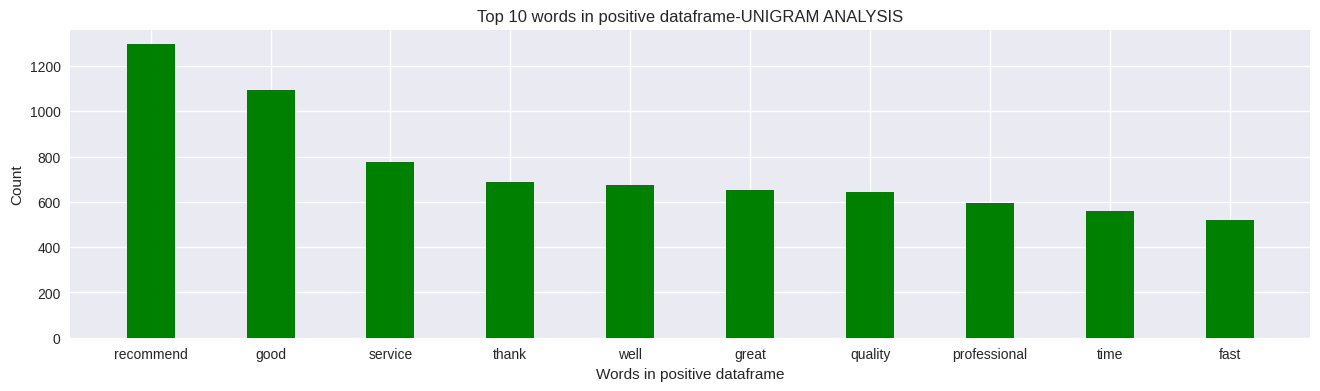

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

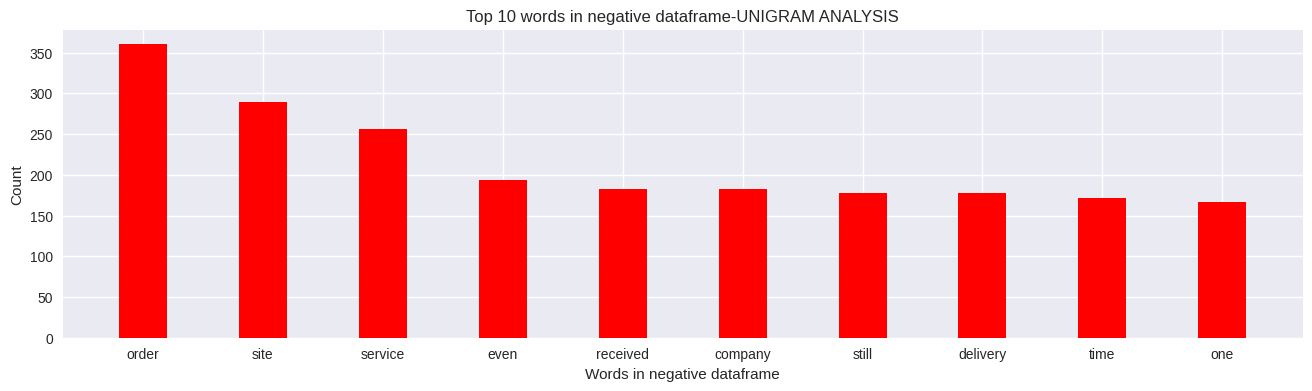

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

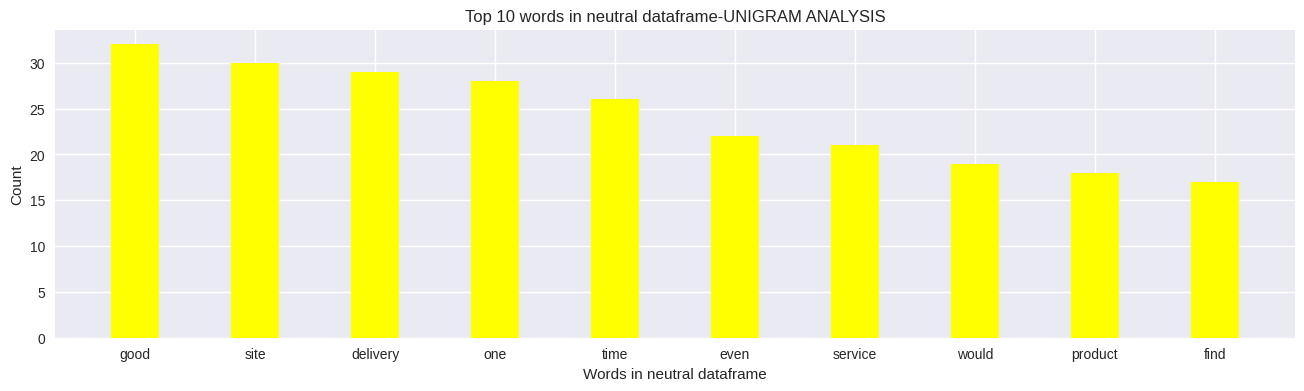

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

### bigram

In [ ]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df[df.sentiment==1].comment_clean_punct:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['us', 'problem', 'paris', 'france', 'real', 'shot', 'dark', 'find', 'someone', 'qualified', 'much', 'less', 'someone', 'willing', 'work', 'person', 'overseas', 'people', 'great', 'trust', 'perfect', 'english', 'spoken', 'work', 'quality', 'excellent', 'highly', 'recommend']
Sentence after removing stopwords: ['wondering', 'call', 'say', 'emphatic', 'yes', 'best', 'find', 'paris', 'hands', 'professional', 'thorough', 'ensures', 'top', 'quality', 'work', 'personable', 'tell', 'cares', 'customers', 'best', 'work', 'kitchen', 'bathroom', 'amazing', 'gave', 'much', 'peace', 'mind', 'know', 'everything', 'right', 'work', 'speaks', 'favor', 'save', 'headache', 'call', 'wont', 'regret']
Sentence after removing stopwords: ['multiple', 'plumbing', 'issues', 'apartment', 'would', 'instantly', 'call', 'handyman', 'hes', 'responsive', 'quickly', 'takes', 'care', 'issue', 'went', 'apartment', 'next', 'day', 'scheduled', 'time', 'efficient', 'friendly', 'would', 'h

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df[df.sentiment==-1].comment_clean_punct:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['contact', 'plumber', 'came', 'took', 'e', 'fix', 'anything', 'gave', 'quote', 'e', 'another', 'plumber', 'days', 'later', 'work', 'e', 'resolving', 'problem']
Sentence after removing stopwords: ['extremely', 'disappointed', 'plumber', 'came', 'check', 'leak', 'change', 'tap', 'shower', 'everything', 'rushed', 'botched', 'leak', 'plumber', 'told', 'us', 'bring', 'second', 'plumber', 'another', 'company', 'second', 'assessment', 'paid', 'twice', 'first', 'time', 'unnecessarily', 'addition', 'faucet', 'break', 'extremely', 'poorly', 'done', 'since', 'bolt', 'leaking', 'created', 'second', 'leak', 'faucet', 'incorrectly', 'installed', 'shower', 'head', 'unusable', 'cord', 'reposition', 'faucet', 'plumber', 'hurry', 'told', 'didnt', 'time', 'take', 'care', 'another', 'mission', 'paid', 'services', 'one', 'vain']
Sentence after removing stopwords: ['company', 'avoid', 'replace', 'faucet', 'scam', 'recommend', 'repair', 'company']
Sentence after removing s

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df[df.sentiment==0].comment_clean_punct:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['newest', 'device', 'sapphire', 'expensive', 'wifi', 'plans', 'vary', 'greatly', 'according', 'country', 'youre', 'last', 'specified', 'number', 'days', 'days', 'really', 'inconvenient', 'traveling', 'multiple', 'countries', 'course', 'global', 'pass', 'cost', 'exorbitant', 'also', 'battery', 'life', 'states', 'lasts', 'hours', 'using', 'maybe', 'hours', 'almost', 'dead', 'also', 'also', 'one', 'time', 'noticed', 'depleted', 'data', 'even', 'though', 'another', 'network', 'every', 'time', 'im', 'using', 'turn', 'prevent', 'stealing', 'data', 'also', 'helps', 'dismal', 'battery', 'life', 'great', 'idea', 'needs', 'lot', 'work']
Sentence after removing stopwords: ['happy', 'know', 'offer', 'hiphop', 'afro', 'lessons', 'came', 'accompany', 'friend', 'interested', 'registering']
Sentence after removing stopwords: ['probably', 'one', 'enchanting', 'stores', 'paris', 'much', 'worth', 'visit', 'ambiance', 'star', 'review', 'experience', 'fails', 'product', 

In [ ]:
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

In [ ]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]
nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

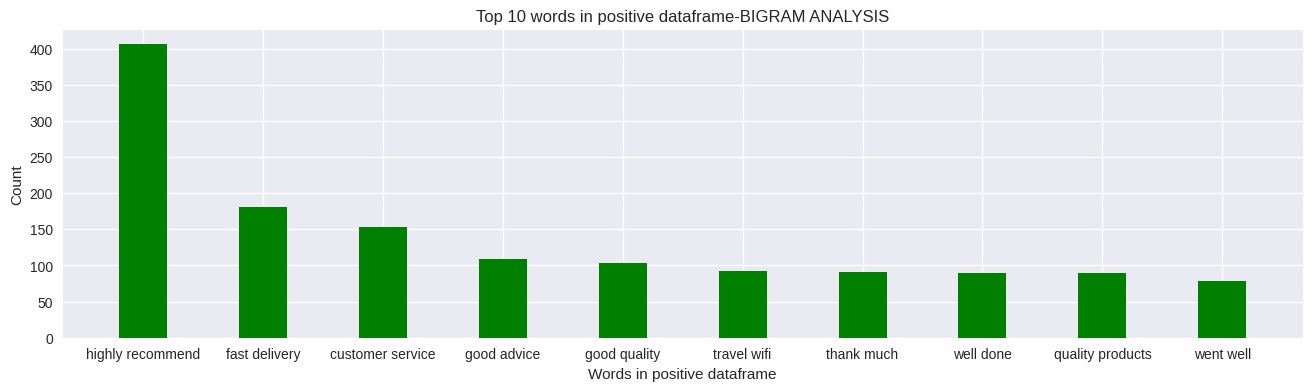

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")
plt.show()

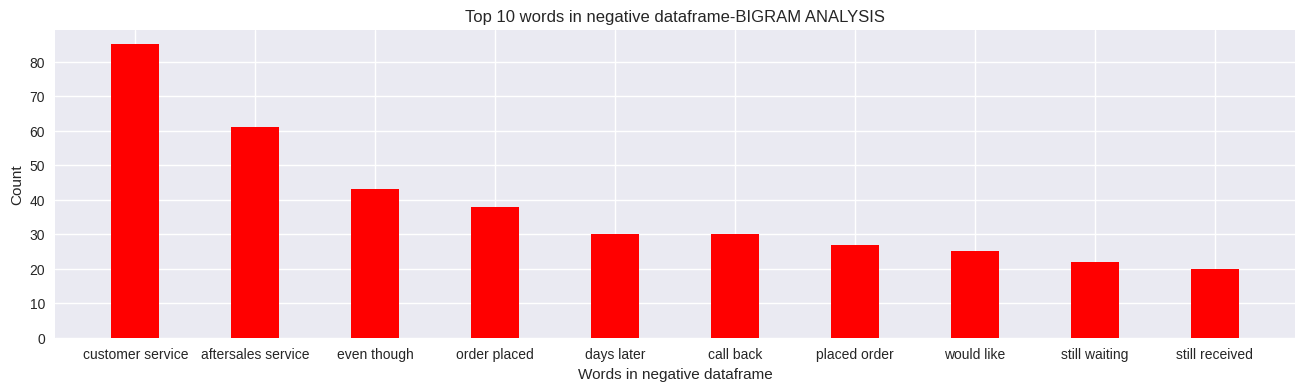

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

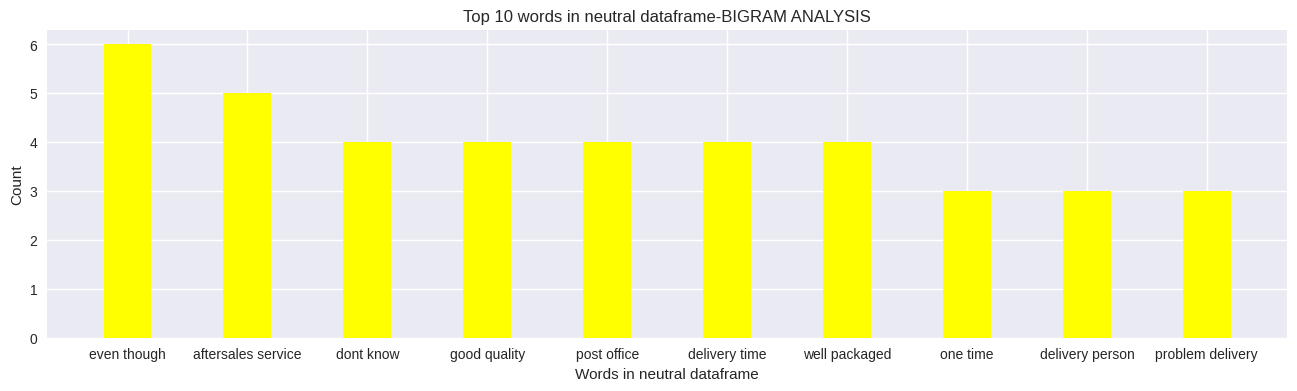

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

### Trigram

In [ ]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df[df.sentiment==1].comment_clean_punct:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['us', 'problem', 'paris', 'france', 'real', 'shot', 'dark', 'find', 'someone', 'qualified', 'much', 'less', 'someone', 'willing', 'work', 'person', 'overseas', 'people', 'great', 'trust', 'perfect', 'english', 'spoken', 'work', 'quality', 'excellent', 'highly', 'recommend']
Sentence after removing stopwords: ['wondering', 'call', 'say', 'emphatic', 'yes', 'best', 'find', 'paris', 'hands', 'professional', 'thorough', 'ensures', 'top', 'quality', 'work', 'personable', 'tell', 'cares', 'customers', 'best', 'work', 'kitchen', 'bathroom', 'amazing', 'gave', 'much', 'peace', 'mind', 'know', 'everything', 'right', 'work', 'speaks', 'favor', 'save', 'headache', 'call', 'wont', 'regret']
Sentence after removing stopwords: ['multiple', 'plumbing', 'issues', 'apartment', 'would', 'instantly', 'call', 'handyman', 'hes', 'responsive', 'quickly', 'takes', 'care', 'issue', 'went', 'apartment', 'next', 'day', 'scheduled', 'time', 'efficient', 'friendly', 'would', 'h

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df[df.sentiment==-1].comment_clean_punct:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['contact', 'plumber', 'came', 'took', 'e', 'fix', 'anything', 'gave', 'quote', 'e', 'another', 'plumber', 'days', 'later', 'work', 'e', 'resolving', 'problem']
Sentence after removing stopwords: ['extremely', 'disappointed', 'plumber', 'came', 'check', 'leak', 'change', 'tap', 'shower', 'everything', 'rushed', 'botched', 'leak', 'plumber', 'told', 'us', 'bring', 'second', 'plumber', 'another', 'company', 'second', 'assessment', 'paid', 'twice', 'first', 'time', 'unnecessarily', 'addition', 'faucet', 'break', 'extremely', 'poorly', 'done', 'since', 'bolt', 'leaking', 'created', 'second', 'leak', 'faucet', 'incorrectly', 'installed', 'shower', 'head', 'unusable', 'cord', 'reposition', 'faucet', 'plumber', 'hurry', 'told', 'didnt', 'time', 'take', 'care', 'another', 'mission', 'paid', 'services', 'one', 'vain']
Sentence after removing stopwords: ['company', 'avoid', 'replace', 'faucet', 'scam', 'recommend', 'repair', 'company']
Sentence after removing s

In [ ]:
for text in df[df.sentiment==0].comment_clean_punct:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>

Sentence after removing stopwords: ['newest', 'device', 'sapphire', 'expensive', 'wifi', 'plans', 'vary', 'greatly', 'according', 'country', 'youre', 'last', 'specified', 'number', 'days', 'days', 'really', 'inconvenient', 'traveling', 'multiple', 'countries', 'course', 'global', 'pass', 'cost', 'exorbitant', 'also', 'battery', 'life', 'states', 'lasts', 'hours', 'using', 'maybe', 'hours', 'almost', 'dead', 'also', 'also', 'one', 'time', 'noticed', 'depleted', 'data', 'even', 'though', 'another', 'network', 'every', 'time', 'im', 'using', 'turn', 'prevent', 'stealing', 'data', 'also', 'helps', 'dismal', 'battery', 'life', 'great', 'idea', 'needs', 'lot', 'work']
Sentence after removing stopwords: ['happy', 'know', 'offer', 'hiphop', 'afro', 'lessons', 'came', 'accompany', 'friend', 'interested', 'registering']
Sentence after removing stopwords: ['probably', 'one', 'enchanting', 'stores', 'paris', 'much', 'worth', 'visit', 'ambiance', 'star', 'review', 'experience', 'fails', 'product', 

In [ ]:
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [ ]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

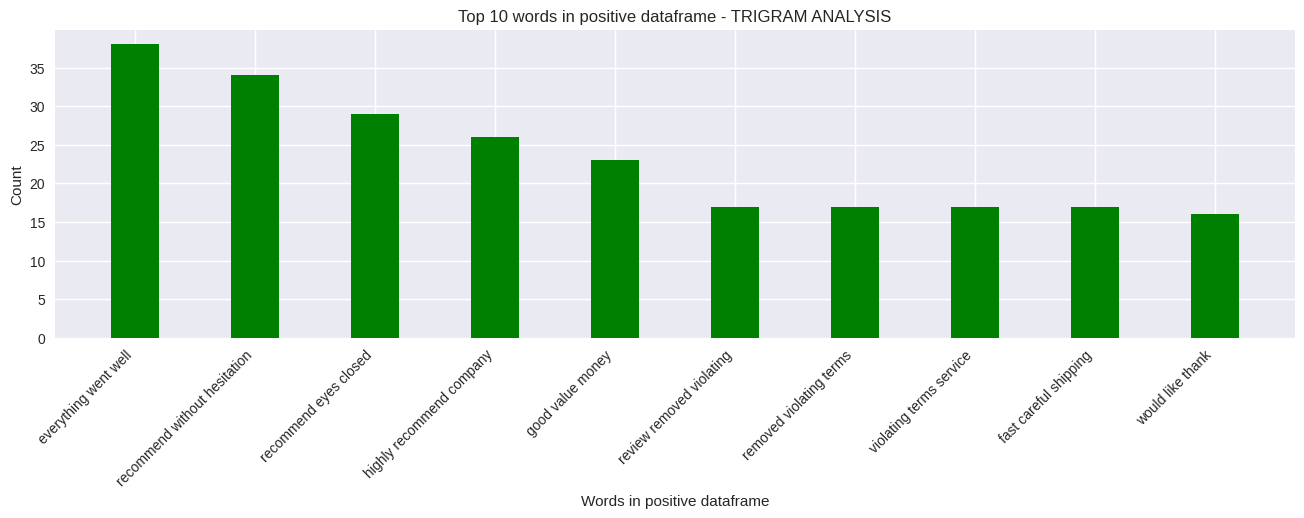

In [ ]:
plt.figure(1, figsize=(16, 4))
plt.bar(pd1tri, pd2tri, color='green', width=0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe - TRIGRAM ANALYSIS")

# Rotate x-axis labels with inclination
plt.xticks(rotation=45, ha='right')

plt.show()

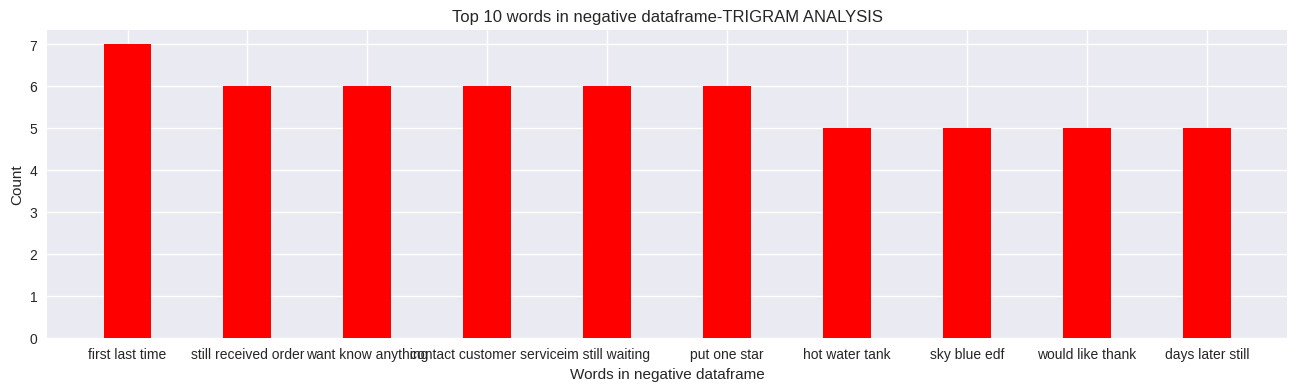

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

## 3. Summary & Generation




This part was too heavy for colab but was implemented locally (check notebook "TS5 Summary.ipynb")

In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-summarize-news")
model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-summarize-news")

def summarize(text, max_length=150):
  input_ids = tokenizer.encode(text, return_tensors="pt", add_special_tokens=True)

  generated_ids = model.generate(input_ids=input_ids, num_beams=2, max_length=max_length,  repetition_penalty=2.5, length_penalty=1.0, early_stopping=True)

  preds = [tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=True) for g in generated_ids]

  return preds[0]


In [ ]:
import concurrent.futures
from tqdm import tqdm

businesses = new_df['name'].unique()

def process_business(business_name):
    business_comments = new_df[new_df['name'] == business_name]['comment'].tolist()
    if not business_comments:
        return business_name, "No comments available"

    combined_comments = " ".join(business_comments)
    summary = summarize(combined_comments)
    return business_name, summary

# Use ThreadPoolExecutor for parallel processing
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Prepare futures and wrap them with tqdm for progress display
    futures = [executor.submit(process_business, business_name) for business_name in businesses]
    results = [future.result() for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures))]

# Extracting summaries from results
summaries = dict(results)

# Mapping summaries to the dataframe
new_df['comment_summary'] = new_df['name'].map(summaries)


In [ ]:
new_df.to_csv("df_new_format_abs_summarized.csv", index=False)

## 5. Embedding to identify similar words

In [ ]:
df_merged.head()

name  \
0                   Peeweepaw   
1                Pinktropical   
2                      Invers   
3                   Equi-Clic   
4  Le meilleur pour mon lapin   

                                                link  \
0    https://fr.trustpilot.com/review/peeweepaw.shop   
1   https://fr.trustpilot.com/review/pinktropical.fr   
2         https://fr.trustpilot.com/review/invers.fr   
3     https://fr.trustpilot.com/review/equi-clic.com   
4  https://fr.trustpilot.com/review/www.boutique-...   

                                         description  average_score  \
0  PeeweePaw est une petite entreprise artisanale...            4.9   
1  Spécialiste du terrarium tropical. [PLANTES - ...            4.9   
2  Invers élève des vers de farine en Auvergne po...            4.9   
3  Retrouvez sur Equi-Clic plus de 40 000 référen...            4.9   
4  Le Meilleur pour mon lapin est un blog de cons...            4.9   

   number_votes                                           comments  \
0          1408  {'Paquet soignée\nLivraison rapide\nToujours s...   
1          1014                                                 {}   
2           766  {'Livraison ultra rapide, le colis est arrivé ...   
3           542  {"Personne réactive aux demandes, c'est assez ...   
4           305  {'très belle qualité de foin!': '5', 'Merci po...   

                   email     phone_number  \
0               no email  no phone number   
1               no email  no phone number   
2               no email  no phone number   
3  support@equi-clic.com       0253480764   
4               no email  no phone number   

                                            location  \
0                            63110, Beaumont, France   
1   421 rue des calandre,, 30127, Bellegarde, France   
2     Champs de la croix, 63720, Saint-Ignat, France   
3  2 allée Michel Desjoyaux, 85340, Les Sables d'...   
4  12 rue Marguerite Yourcenar, 31130, Quint-fons...   

                                       comments_dict  \
0  {'Paquet soignée
Livraison rapide
Toujours sat...   
1                                                 {}   
2  {'Livraison ultra rapide, le colis est arrivé ...   
3  {'Personne réactive aux demandes, c'est assez ...   
4  {'très belle qualité de foin!': '5', 'Merci po...   

                                 comments_dict_clean  \
0  {'Paquet soignée Livraison rapide Toujours sat...   
1                                                 {}   
2  {'Livraison ultra rapide, le colis est arrivé ...   
3  {'Personne réactive aux demandes, c'est assez ...   
4  {'très belle qualité de foin!': '5', 'Merci po...   

                                   description_clean language_desc  \
0  PeeweePaw est une petite entreprise artisanale...            fr   
1  Spécialiste du terrarium tropical. [PLANTES - ...            pt   
2  Invers élève des vers de farine en Auvergne po...            fr   
3  Retrouvez sur Equi-Clic plus de 40 000 référen...            fr   
4  Le Meilleur pour mon lapin est un blog de cons...            fr   

                                   description_corr1  \
0  PeeweePaw est une petite entreprise artisanale...   
1  Spécialiste du terrarium tropical. [PLANTES - ...   
2  Invers élève des vers de farine en Auvergne po...   
3  Retrouvez sur Equi-Clic plus de 40 000 référen...   
4  Le Meilleur pour mon lapin est un blog de cons...   

                                   description_corr2  distance_correction  \
0  PeeweePaw est une petite entreprise artisanale...                    0   
1  Spécialiste du terrarium tropical. [PLANTES — ...                    4   
2  Inversé lève des vers de farine en Auvergne po...                    4   
3  Retrouvez sur Qui-Clic plus de 40 000 référenc...                   13   
4  Le Meilleur pour mon lapin est un blog de cons...                    0   

                              description_trad_clean  
0  PeeweePaw is a small French artisanal company ...  
1  Tropical terrarium specia

Preprocessing

In [ ]:
import re
import pandas as pd
from gensim.models import word2vec
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
#from nltk.stem import SnowballStemmer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# matplotlib inline

# Ensure you have downloaded the necessary NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stopwords and stemmer
STOP_WORDS = stopwords.words('english')
#stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()


def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def clean_sentence(val):
    "tokenize sentences, remove non-alphabetic characters, lemmatize, and remove stopwords"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    words = word_tokenize(sentence)
    nltk_tagged = pos_tag(words)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if word not in STOP_WORDS and word.isalpha():
            if tag is None:
                # If there is no available tag, append the token as is
                lemmatized_sentence.append(word)
            else:
                # Else use the tag to lemmatize the token
                lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return lemmatized_sentence

def clean_dataframe(data):
    "Apply 'clean_sentence' function to each row in the dataframe"
    for col in data.columns:
        # Tokenize and clean each entry
        data[col] = data[col].apply(clean_sentence)
        # Drop any rows with empty fields after preprocessing
        data = data[data[col].map(lambda d: len(d)) > 0]
    return data

# Assuming 'df' is your original DataFrame and 'description_corr1_trad' is the column with text data
#Removing problematic rows
data = pd.DataFrame(df_merged[(df_merged["name"] != "Electricien Grand-paris") & (df_merged["name"] != "Parent Mission")]['description_trad_clean'])
data = clean_dataframe(data)

# Extract sentences for Word2Vec training (a list of token lists)
sentences = data['description_trad_clean'].tolist()

# Train the Word2Vec model
model = word2vec.Word2Vec(sentences, vector_size=100, window=20, min_count=200, workers=4)

# Check the first 10 words in the vocabulary
vocab = list(model.wv.index_to_key)
print(vocab[:10])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['service', 'offer', 'company', 'professional', 'work', 'product', 'home', 'support', 'need', 'dog']


GloVe

In [ ]:
!python -m spacy download en_core_web_md


2024-01-24 21:21:10.612885: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-24 21:21:10.618286: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-24 21:21:10.621461: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-24 21:21:14.076164: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 1.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the GloVe embeddings using spaCy
nlp = spacy.load("en_core_web_md")

# Define the target word
target_word = "job"

# Create a Doc object for the target word
target_doc = nlp(target_word)

# Filter and store relevant words for comparison (excluding the target word)
relevant_words = [word for word in nlp.vocab if word.has_vector and word.text != target_word]

similar_words = []

# Calculate cosine similarity for relevant words
for word in relevant_words:
    similarity = cosine_similarity([target_doc.vector], [word.vector])[0][0]
    similar_words.append((word.text, similarity))

# Sort similar words by similarity score in descending order
similar_words.sort(key=lambda x: x[1], reverse=True)

# Define a similarity threshold (adjust as needed)
similarity_threshold = 0.6

# Display similar words along with their similarity scores
for word, similarity in similar_words:
    print(f"{word}: Similarity Score = {similarity:.2f}")

# Optionally, filter similar words above the threshold and display them
top_similar_words = [(word, similarity) for word, similarity in similar_words if similarity > similarity_threshold]

# Display the top similar words above the threshold
if top_similar_words:
    print("\nTop similar words above the threshold:")
    for word, similarity in top_similar_words[:20]:
        print(f"{word}: Similarity Score = {similarity:.2f}")
else:
    print("\nNo similar words found above the threshold.")


somethin: Similarity Score = 0.39
what's: Similarity Score = 0.38
what: Similarity Score = 0.38
nothin: Similarity Score = 0.36
you: Similarity Score = 0.36
’cause: Similarity Score = 0.34
Somethin: Similarity Score = 0.34
What's: Similarity Score = 0.31
What: Similarity Score = 0.31
it: Similarity Score = 0.31
n’t: Similarity Score = 0.30
'cause: Similarity Score = 0.29
You: Similarity Score = 0.29
need: Similarity Score = 0.29
Nothin’: Similarity Score = 0.28
Nothin: Similarity Score = 0.28
n't: Similarity Score = 0.28
not: Similarity Score = 0.28
’re: Similarity Score = 0.28
why: Similarity Score = 0.28
I: Similarity Score = 0.27
That: Similarity Score = 0.27
when: Similarity Score = 0.27
're: Similarity Score = 0.27
how: Similarity Score = 0.26
they: Similarity Score = 0.25
ought: Similarity Score = 0.25
When: Similarity Score = 0.25
'm: Similarity Score = 0.25
somethin’: Similarity Score = 0.25
somethin': Similarity Score = 0.25
Somethin': Similarity Score = 0.25
Havin: Similarity

Word2Vec

In [ ]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

"""def preprocess_text(text):
    # Convert to lowercase, remove punctuation, and split into words
    return simple_preprocess(text, deacc=True)"""


# Prepare your list of business descriptions (corpus_data)
corpus_data = data['description_trad_clean'].tolist()
print(corpus_data[0:2])
#tokenized_data = [preprocess_text(description) for description in corpus_data]
# Train Word2Vec model
model = Word2Vec(corpus_data, vector_size=100, window=5, min_count=1, workers=4)
model.wv.init_sims(replace=True)


[['peeweepaw', 'small', 'french', 'artisanal', 'company', 'specialize', 'creation', 'original', 'quality', 'accessory', 'animal', 'since', 'commit', 'offer', 'quality', 'unique', 'equipment', 'accompany', 'pet', 'adventure', 'peeweepaw', 'finally', 'discover', 'robust', 'allterrain', 'environmentally', 'friendly', 'equipment', 'original', 'stylish', 'say', 'cant', 'chic', 'adventurous', 'time', 'certainly', 'camille'], ['tropical', 'terrarium', 'specialist', 'plant', 'natural', 'decor', 'material', 'food', 'advice']]


<ipython-input-234-595f1d309e09>:15: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.wv.init_sims(replace=True)


In [ ]:
vocab = list(model.wv.index_to_key)

# Print out the first 50 words to inspect
print(vocab[:50])

['service', 'offer', 'company', 'professional', 'work', 'product', 'home', 'support', 'need', 'dog', 'quality', 'make', 'also', 'france', 'customer', 'us', 'find', 'help', 'installation', 'online', 'best', 'specialize', 'provide', 'description', 'repair', 'team', 'business', 'year', 'free', 'solution', 'life', 'create', 'take', 'paris', 'price', 'store', 'individual', 'pet', 'experience', 'design', 'project', 'move', 'day', 'locksmith', 'care', 'cat', 'animal', 'allow', 'equipment', 'training']


Cosine Distance

In [ ]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# Example of training a Word2Vec model
# model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

# Normalize the vectors (optional but recommended for better comparison)
model.wv.init_sims(replace=True)

# Function to compute cosine similarity between two words
def get_cosine_similarity(model, word1, word2):
    if word1 in model.wv and word2 in model.wv:
        vector1 = model.wv[word1].reshape(1, -1)
        vector2 = model.wv[word2].reshape(1, -1)
        similarity = cosine_similarity(vector1, vector2)
        return similarity[0][0]
    else:
        return "One or both words not in the model's vocabulary."

# Example usage
word1 = input("Enter first word: ")
word2 = input("Enter second word: ")
similarity_score = get_cosine_similarity(model, word1, word2)
print(f"Cosine similarity between '{word1}' and '{word2}': {similarity_score}")


<ipython-input-220-ddddeb24c709>:8: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.wv.init_sims(replace=True)


Enter first word: cat
Enter second word: dog
Cosine similarity between 'cat' and 'dog': 0.9994361996650696


Matplotlib

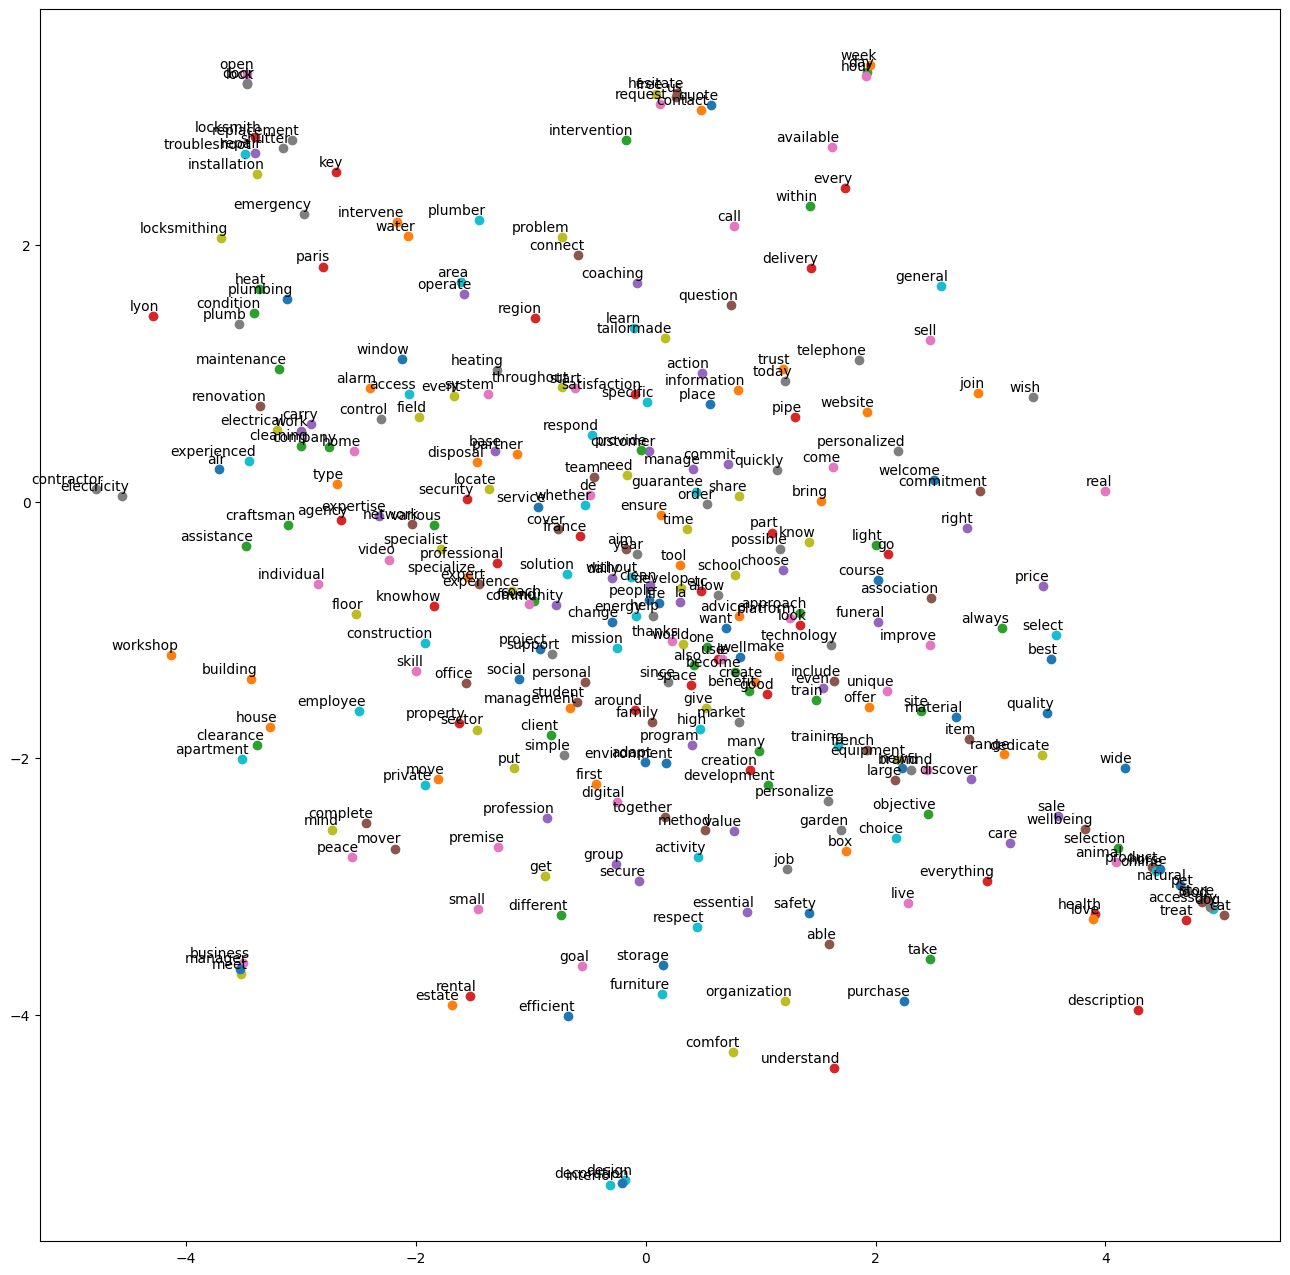

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DejaVu Sans'
def tsne_plot(model):
    # Extract vocabulary
    vocab = list(model.wv.index_to_key)[:300]

    # Prepare data for t-SNE
    labels = []
    tokens = []

    for word in vocab:
        tokens.append(model.wv[word])
        labels.append(word)

    tokens = np.array(tokens)

    # Perform t-SNE
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = new_values[:, 0]
    y = new_values[:, 1]

    # Plot the t-SNE visualization
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

# Visualize word embeddings for business descriptions
tsne_plot(model)


Umap for Gensim Model

In [ ]:
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=4812cf748bca79f90578f7ee74205e90bcabeb3c3ae91bb26bb41ead603c5b72
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [ ]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=cce1f4a62836ff46536fff3ad4c7721fe895de8df4559af43be4a12a947c31ec
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
"""import numpy as np
#import umap
import umap.umap_ as umap
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

def umap_plot_gensim(model, vocab):
    # Extract word vectors from the gensim Word2Vec model
    vectors = [model.wv[word] for word in vocab]

    # Prepare data for UMAP
    labels = vocab
    tokens = np.array(vectors)

    # Perform UMAP
    umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='cosine').fit_transform(tokens)

    x = umap_model[:, 0]
    y = umap_model[:, 1]

    # Plot the UMAP visualization
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

# Assuming you have a 'vocab' list of vocabulary words
# Pass your gensim Word2Vec model to umap_plot_gensim
umap_plot_gensim(model, vocab[:300])"""


"import numpy as np\n#import umap\nimport umap.umap_ as umap\nimport matplotlib.pyplot as plt\nfrom gensim.models import Word2Vec\n\ndef umap_plot_gensim(model, vocab):\n    # Extract word vectors from the gensim Word2Vec model\n    vectors = [model.wv[word] for word in vocab]\n\n    # Prepare data for UMAP\n    labels = vocab\n    tokens = np.array(vectors)\n\n    # Perform UMAP\n    umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='cosine').fit_transform(tokens)\n\n    x = umap_model[:, 0]\n    y = umap_model[:, 1]\n\n    # Plot the UMAP visualization\n    plt.figure(figsize=(16, 16))\n    for i in range(len(x)):\n        plt.scatter(x[i], y[i])\n        plt.annotate(labels[i],\n                     xy=(x[i], y[i]),\n                     xytext=(5, 2),\n                     textcoords='offset points',\n                     ha='right',\n                     va='bottom')\n    plt.show()\n\n# Assuming you have a 'vocab' list of vocabulary words\n# Pass your gensim Word2Vec mod

In [ ]:
#df_nf.to_csv(r"C:\Users\meama\Documents\A5\AAI_Machine_Learning_for_NLP\Project2\trustpilot_yelp_with_.csv", index=False )
from gensim.models import Word2Vec
model.save("word2vec_project.model")

Tensorboard

In [ ]:
#tensorboard --logdir=C:\Users\meama\Documents\A5\AAI_Machine_Learning_for_NLP\Project2\logs

import tensorflow as tf
from tensorboard.plugins import projector
import gensim
import os

word2vec_model = gensim.models.Word2Vec.load("word2vec_project.model")#gensim.models.Word2Vec.load(r"C:\Users\meama\Documents\A5\AAI_Machine_Learning_for_NLP\word2vec.model")  # Update with the actual path

vocab = list(word2vec_model.wv.index_to_key)[:500]
embeddings = np.array([word2vec_model.wv[word] for word in vocab])

# Set up the log directory
log_dir = r""

# Define a Keras model with the Embedding layer
embedding_layer = tf.keras.layers.Embedding(
    input_dim=len(vocab),
    output_dim=embeddings.shape[1],
    embeddings_initializer=tf.constant_initializer(embeddings),
    trainable=False
)

# You need to create a dummy model to save the embedding layer's weights
model = tf.keras.Sequential([embedding_layer])

# Call the model with a dummy input to build it
model(tf.constant([[0]]))

# Save the model's weights
model.save_weights(os.path.join(log_dir, 'embedding_layer_weights.ckpt'))

# Write the metadata for the projector
metadata_path = os.path.join(log_dir, 'metadata.tsv')
with open(metadata_path, 'w') as metadata_file:
    for word in vocab:
        metadata_file.write(f"{word}\n")

# Set up the projector config
config = projector.ProjectorConfig()
embedding_config = config.embeddings.add()
embedding_config.tensor_name = 'embedding/.ATTRIBUTES/VARIABLE_VALUE'
embedding_config.metadata_path = 'metadata.tsv'

# Save the projector config
projector.visualize_embeddings(log_dir, config)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         50000     
                                                                 
Total params: 50000 (195.31 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 50000 (195.31 KB)
_________________________________________________________________


Umap for Tensorflow Model

In [ ]:
"""import numpy as np
import umap
import matplotlib.pyplot as plt

def umap_plot(model, layer_name, vocab):
    # Get the embedding layer from the model
    embedding_layer = model.get_layer(layer_name)
    weights = embedding_layer.get_weights()[0]

    # Prepare data for UMAP
    labels = vocab  # Use the actual vocabulary words as labels
    tokens = weights

    # Perform UMAP
    umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='cosine').fit_transform(tokens)

    x = umap_model[:, 0]
    y = umap_model[:, 1]

    # Plot the UMAP visualization
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

# Assuming you have a 'vocab' list of vocabulary words
# You need to know the name of the embedding layer or the index
umap_plot(model, 'embedding_3', vocab)"""


Semantic Search

In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 943.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.2 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=3a0596a9652dace8c0e6d679cb48b4c9e509a7f2b17ba9917c9c2fdc70d7786a
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained sentence transformer model (e.g., 'paraphrase-MiniLM-L6-v2')
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
# Extract business descriptions as a list
descriptions = df['description_corr1_trad'].tolist()


In [ ]:
# Encode descriptions into embeddings
description_embeddings = model.encode(descriptions, convert_to_tensor=True)


In [ ]:
def semantic_search(query, top_k=5):
    # Encode the user query
    query_embedding = model.encode(query, convert_to_tensor=True)

    # Calculate cosine similarity between query and descriptions
    similarity_scores = util.pytorch_cos_sim(query_embedding, description_embeddings)[0]

    # Get the indices of the most similar descriptions
    top_indices = np.argsort(-similarity_scores)[:top_k]

    # Convert top_indices to integers
    top_indices = [int(idx) for idx in top_indices]

    # Retrieve and return the top-k similar businesses
    top_similar_businesses = [df.iloc[i] for i in top_indices]

    return top_similar_businesses

# Example usage:
user_query = input("Enter your query: ")
top_results = semantic_search(user_query, top_k=5)
print("\n")
# Print the top results
for idx, result in enumerate(top_results, start=1):
    print(f"Result {idx}:")
    print(result['name'])
    print(result['description_corr1'])
    print("-" * 50)


## 4. Topic Modeling and Lists of Topics:

Topic models  are a family of models capable of discovering themes or topics within a collection of textual documents. In this context, a "topic" refers to groups of words that frequently co-occur within the same document.

In our application, we will define topics based on the description of each services in our dataset. Topic models do not assign names to these topics; it is our task to interpret and label them.

### Library install

In [ ]:
pip install --upgrade pandas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install numpy==1.24.4
!pip install python-multipart
!pip install uvicorn
!pip install kaleido
!pip install fastapi

In [ ]:
%run -m spacy download fr_core_news_sm

✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [ ]:
!python -m spacy download en_core_web_sm
!pip install pyLDAvis==3.4.1

2024-01-21 16:57:40.355594: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-21 16:57:40.355651: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-21 16:57:40.356993: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-21 16:57:41.859981: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 18.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
!pip install pyLDAvis -qq
!pip install -qq -U gensim
!pip install spacy -qq
!pip install matplotlib -qq
!pip install seaborn -qq
!python -m spacy download en_core_web_md -qq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

2024-01-21 16:59:33.806213: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-21 16:59:33.806286: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-21 16:59:33.808189: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-21 16:59:35.112972: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 13.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Data Load

In [ ]:
df=pd.read_csv("/content/df_mergedV4.csv",sep=',')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0                         name  \
0           0   American Handyman in Paris   
1           1        Les Clés du Bricolage   
2           2  Maison travaux & rénovation   
3           3                Except Design   
4           4              Le Mari à Louer   

                                                link  \
0  https://www.yelp.fr/biz/american-handyman-in-p...   
1  https://www.yelp.fr/biz/les-cl%C3%A9s-du-brico...   
2  https://www.yelp.fr/biz/maison-travaux-et-r%C3...   
3  https://www.yelp.fr/biz/except-design-paris?os...   
4  https://www.yelp.fr/biz/le-mari-%C3%A0-louer-p...   

                                         description  average_score  \
0  Petits travaux à domicile Électricien Plombier...            5.0   
1  Petits travaux à domicile Design d’intérieur R...            5.0   
2   Maison Travaux & Rénovation est un acteur loc...           -1.0   
3  Design d’intérieur  Except Design est un colle...            5.0   
4                              General Contractors              4.3   

   number_votes                                           comments  \
0             6  {'When you are in the US and your problem is i...   
1             2  {"04/03/2013\nUn concept génial ! une mise en ...   
2            -1                                                 {}   
3             1  {'13/04/2015\nService vraiment excellent': '4....   
4             3                                                 {}   

                          email     phone_number  \
0    americanhandymaninparis.fr   06 12 32 04 39   
1         lesclesdubricolage.fr   01 75 77 87 39   
2  maison-travaux-renovation.co   06 48 99 40 03   
3              exceptdesign.com   06 50 81 36 05   
4       lemarialouer.fr/q-e.htm  no phone number   

                                          location  \
0                                      no location   
1                27 rue du Chemin Vert 75011 Paris   
2                 64 rue servandoni 33000 Bordeaux   
3  12 bis rue Robert et Sonia Delaunay 75011 Paris   
4                                      no location   

                                       comments_dict  \
0  {'When you are in the US and your problem is i...   
1  {"04/03/2013\nUn concept génial ! une mise en ...   
2                                                 {}   
3  {'13/04/2015\nService vraiment excellent': '4....   
4                                                 {}   

                                 comments_dict_clean  \
0  {'When you are in the US and your problem is i...   
1  {" Un concept génial ! une mise en pratique à ...   
2                                                 {}   
3  {' Service vraiment excellent': '4', " Si vous...   
4                                                 {}   

                                   description_clean  \
0  Petits travaux à domicile Électricien Plombier...   
1  Petits travaux à domicile Design d’intérieur R...   
2   Maison Travaux & Rénovation est un acteur loc...   
3  Design d’intérieur  Except Design est un colle...   
4                              General Contractors     

                            comments_dict_trad_clean  \
0  {'When you are in the US and your problem is i...   
1  {'A brilliant concept! a practical application...   
2                                                 {}   
3  {'Truly excellent service': '4', "If you love ...   
4                                                 {}   

                              description_trad_clean  
0  Small home jobs Electrician Plumber Appliance ...  
1  Small jobs at home Interior design Flooring Up...  
2  Maison Travaux & Rénovation is a local player ...  
3  Interior design Except Design is a collective ...  
4                                General Contractors

In [ ]:
description_df=df['description_trad_clean']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Data processing

In [ ]:
textes = description_df[description_df.notnull()] # we drop null description
textes.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    Small home jobs Electrician Plumber Appliance ...
1    Small jobs at home Interior design Flooring Up...
2    Maison Travaux & Rénovation is a local player ...
3    Interior design Except Design is a collective ...
4                                  General Contractors
Name: description_trad_clean, dtype: object

Spacy_docs is a list of spaCy Doc objects, each Doc corresponds to a processed description from the original DataFrame.
These Doc objects contain the linguistic annotations and information generated by spaCy for each description.

In [ ]:
%%time

spacy_docs = list(nlp.pipe(textes))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 20.3 s, sys: 573 ms, total: 20.9 s
Wall time: 21.5 s



 We will transform each spaCy description into a list of tokens. Instead of using the original tokens, we will work with lemmas instead. This will allow our model to generalize better. Indeed, we want, for example, "continuation" and "continuations" to represent the same meaning. Here is the complete list of preprocessing steps:



1.   Remove all words with fewer than 3 characters
2.   Remove all stop words
3.   Lemmatize the remaining words
4.   Convert these words to lowercase




In [ ]:
%%time

docs = []
for doc in spacy_docs:
    tokens = []
    for token in doc:
        if len(token.orth_) > 3 and not token.is_stop: # prétraitements 1 et 2
            tokens.append( token.lemma_.lower() )  # TODO: prétraitements 3 et 4
    docs.append( tokens )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 215 ms, sys: 3.73 ms, total: 219 ms
Wall time: 433 ms


In [ ]:
print(docs[0]) # output of the first description tokenized

['small', 'home', 'job', 'electrician', 'plumber', 'appliance', 'installation', 'bathtub', 'installation', 'handyman', 'caulk', 'door', 'repair', 'appliance', 'repair', 'bathtub', 'repair', 'door', 'installation', 'drain', 'installation']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(docs[1])

['small', 'job', 'home', 'interior', 'design', 'floor', 'upholstery', 'course', 'home', 'paris', 'france', 'small', 'large', 'job', 'start', 'complete', 'confidence', 'train', 'support', 'directly', 'construction', 'site', 'work', 'coach', 'learn', 'skill', 'carry', 'work', 'save', 'money', 'found', '2012', 'class', 'home', 'paris', 'france', 'learn', 'achieve', 'save', 'small', 'large', 'job', 'start', 'complete', 'confidence', 'key', 'coach', 'train', 'support', 'directly', 'construction', 'site', 'learn', 'skill', 'carry', 'work', 'save', 'money']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



In order to preserve some word order during our modeling, we will take into account frequent bigrams. To achieve this, we will use the Gensim library (an excellent NLP library for topic modeling and word embeddings).

Here is the adopted process:



1.   Identify frequent bigrams in the corpus,
2.   Add them to the list of tokens for the documents where they appear



This means that the bigrams will not be in their correct position in the text. However, since topic models are bag-of-words models that ignore the position of words, this does not pose any issues.

In [ ]:
import re
from gensim.models import Phrases

bigram = Phrases(docs, min_count=10)

for index in range(len(docs)):
    for token in bigram[docs[index]]:
        if '_' in token:  # les bigrammes peuvent être reconnus par "_" qui concatène les mots
            docs[index].append(token) # TODO

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(docs[4])

['general', 'contractor', 'general_contractor']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Let's move on to the final step of preprocessing specific to Gensim. Firstly, we will create a dictionary representation of the description. This dictionary will map each word to a unique identifier, assisting us in constructing bag-of-words representations for each description. These bag-of-words representations contain word identifiers along with their frequencies. Additionally, we can eliminate the least frequent and most frequent words from the vocabulary. This will enhance the quality of our model and expedite its training.

In [ ]:
from gensim.corpora import Dictionary

dictionary = Dictionary(docs)
print('Nombre de mots unique dans les documents initiaux :', len(dictionary))

dictionary.filter_extremes(no_below=3, no_above=0.25)
print('Nombre de mots unique dans les documents après avoir enlevé les mots fréquents/peu fréquents :', len(dictionary))

print("Exemple :", dictionary.doc2bow(docs[4]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nombre de mots unique dans les documents initiaux : 9626
Nombre de mots unique dans les documents après avoir enlevé les mots fréquents/peu fréquents : 2773
Exemple : [(92, 1), (93, 1), (94, 1)]


In [ ]:
corpus = [ dictionary.doc2bow(doc) for doc in docs] # Bag of words for each description

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Topic Modeling with LDA

In [ ]:
%%time
from gensim.models import LdaModel

model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, chunksize=1000, passes=5, random_state=1) # A REMPLIR

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 5.08 s, sys: 27.2 ms, total: 5.11 s
Wall time: 5.81 s


### Results and visualisation

We print words that represent the most each topic.


*   Topic 1: Recruitment & training
*   Topic 2: Good services


*   Topic 3: Financial Management & life coach


*   Topic 4: Home services
*   Topic 5: Energy conservation







In [ ]:
for (topic, words) in model.print_topics():
    print("***********")
    print("* topic", topic+1, "*")
    print("***********")
    print(topic+1, ":", words)
    print()

***********
* topic 1 *
***********
1 : 0.055*"support" + 0.030*"recruitment" + 0.028*"training" + 0.028*"offer" + 0.027*"week" + 0.026*"genealogy" + 0.024*"association" + 0.020*"candidate" + 0.019*"online" + 0.016*"mission"

***********
* topic 2 *
***********
2 : 0.017*"good" + 0.017*"offer" + 0.014*"dog" + 0.013*"locally" + 0.011*"price" + 0.010*"quality" + 0.010*"plumbing" + 0.010*"sale" + 0.010*"cat" + 0.009*"plumber"

***********
* topic 3 *
***********
3 : 0.024*"financial" + 0.022*"management" + 0.019*"offer" + 0.018*"coach" + 0.016*"life" + 0.016*"firm" + 0.015*"dream" + 0.014*"manager" + 0.014*"tool" + 0.013*"profile"

***********
* topic 4 *
***********
4 : 0.029*"home" + 0.028*"service" + 0.020*"training" + 0.018*"study" + 0.016*"technology" + 0.016*"support" + 0.015*"platform" + 0.014*"assistance" + 0.014*"energy" + 0.013*"benefit"

***********
* topic 5 *
***********
5 : 0.044*"energy" + 0.041*"reduce" + 0.036*"description" + 0.035*"help" + 0.032*"business" + 0.030*"advic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We can visualize it using pyLDAvis, it shows most import word for each topic and the similarity between topics.

For instance Topic 1: Recruitment & Training, the most recurrent words are recruitment, candidate, offer, coach.

For Topic 5: Energy conservation, the most recurrent words are energy, reduce, bill, advise.

Those 2 topics are not similar and so they are distant in the map.

In [ ]:
pyLDAvis.gensim_models.prepare(model, corpus, dictionary, sort_topics=False, n_jobs=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.214666  0.048935       1        1   4.629337
1      0.165667 -0.027635       2        1  11.283702
2     -0.224652  0.078485       3        1   7.086052
3     -0.144348 -0.091930       4        1   9.881194
4     -0.059986 -0.189191       5        1   2.494052
5      0.140815 -0.140058       6        1  11.582063
6      0.151505 -0.028252       7        1   7.541476
7      0.017020 -0.092289       8        1  32.889551
8      0.178982  0.201974       9        1   5.635438
9     -0.010336  0.239959      10        1   6.977134, topic_info=             Term        Freq       Total Category  logprob  loglift
2545  particulier  507.000000  507.000000  Default  30.0000  30.0000
428       product  394.000000  394.000000  Default  29.0000  29.0000
37        support  413.000000  413.000000  Default  28.0000  28.0000
1882       credit  206.000000  206.000000  Default  27.0000  27.0000
188          help  303.000000  303.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
275          hour   35.900593  104.910138  Topic10  -4.6695   1.5902
294      dedicate   35.740472  103.249669  Topic10  -4.6740   1.6017
292     community   34.039013   82.799768  Topic10  -4.7228   1.7736
78           need   37.982786  372.067540  Topic10  -4.6131   0.3806
1025         life   35.477998  269.118985  Topic10  -4.6814   0.6363

[608 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1517      2  0.937904        a.m.
2599      1  0.327407    academic
2599      4  0.358589    academic
2599      5  0.280635    academic
2599      8  0.015591    academic
...     ...       ...         ...
159       8  0.153706        year
159       9  0.005693        year
159      10  0.125242        year
1939      4  0.945175  year_round
263       4  0.951410       young

[1223 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

We print for some description their topic and its probability

In [ ]:
n_doc = 4
i = 0
for (text, doc) in zip(textes[:n_doc], docs[:n_doc]):
    i += 1
    print("***********")
    print("* description", i, "  *")
    print("***********")
    print(text)
    print([(topic+1, prob) for (topic, prob) in model[dictionary.doc2bow(doc)] if prob > 0.1])
    print()

***********
* description 1   *
***********
Small home jobs Electrician Plumber Appliance installation Bathtub installation Handyman caulking Door repair Appliance repair Bathtub repair Door installation Drain installation
[(2, 0.36834443), (6, 0.3875115), (7, 0.15544744)]

***********
* description 2   *
***********
Small jobs at home Interior design Flooring Upholstery DIY courses at home, Paris and Ile de France. Small or large jobs? Get started with complete confidence, you are trained and supported directly on YOUR construction site by our work coaches. You learn skills, you carry out your work and you save money. Founded in 2012. DIY classes at home, Paris and Ile de France. Learn, achieve, save. Small or large jobs, get started with complete confidence. The DIY keys coaches train you and support you directly on your construction site. You learn skills, you carry out your work and you save money.
[(1, 0.14942756), (6, 0.27489698), (8, 0.27284446), (9, 0.10925842)]

***********
* 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 6. Supervised Learning

### Sentiment Analysis

In [ ]:
import numpy as np
import pandas as pd
import datetime
import calendar
import string
from scipy import sparse
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import neighbors
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from sklearn.metrics import f1_score, accuracy_score
from sklearn import model_selection, naive_bayes
from nltk.corpus import words
nltk.download('stopwords')
stop = stopwords.words('english')



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Hugging face

In [ ]:
df=pd.read_csv("df_new_format_trad.csv",sep=",")
df.head()

name                                             link  \
0  Peeweepaw  https://fr.trustpilot.com/review/peeweepaw.shop   
1  Peeweepaw  https://fr.trustpilot.com/review/peeweepaw.shop   
2  Peeweepaw  https://fr.trustpilot.com/review/peeweepaw.shop   
3  Peeweepaw  https://fr.trustpilot.com/review/peeweepaw.shop   
4  Peeweepaw  https://fr.trustpilot.com/review/peeweepaw.shop   

                                         description  average_score  \
0  PeeweePaw is a small French artisanal company ...            4.9   
1  PeeweePaw is a small French artisanal company ...            4.9   
2  PeeweePaw is a small French artisanal company ...            4.9   
3  PeeweePaw is a small French artisanal company ...            4.9   
4  PeeweePaw is a small French artisanal company ...            4.9   

   number_votes                                            comment  score  \
0          1408  Neat package Fast delivery Always satisfied wi...    5.0   
1          1408                Super quality, impeccable finishes.    5.0   
2          1408  Once again, delighted with this order! A new m...    5.0   
3          1408  Very satisfied with my small order: the Sailor...    5.0   
4          1408  I ordered a multi-position paracord leash and ...    4.0   

      email     phone_number                 location  \
0  no email  no phone number  63110, Beaumont, France   
1  no email  no phone number  63110, Beaumont, France   
2  no email  no phone number  63110, Beaumont, France   
3  no email  no phone number  63110, Beaumont, France   
4  no email  no phone number  63110, Beaumont, France   

                                       comment_corr1  
0  Paquet soignée Livraison rapide Toujours satis...  
1             Super qualité, finitions impeccables.   
2  Encore une fois, ravie de cette commande ! Une...  
3  Très satisfaite de ma petite commande : les no...  
4  J'ai commandé une laisse multi-positions en pa...

In [ ]:
df= df.dropna(subset=['score'])

In [ ]:
df = df.dropna(subset=['comment'])
df=df[df['comment'] != ""] # we remove empty comments

In [ ]:
#!pip install transformers
from transformers import pipeline


In [ ]:
classification = pipeline(
    task="sentiment-analysis",
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student",
    return_all_scores=True
)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
df['prediction_sentiment'] = df['comment'].apply(lambda x: classification(x[:512]))

In [ ]:
# Extract features from the sentiment analysis results
df['predicted_sentiment_label'] = df['prediction_sentiment'].apply(lambda x: max(x[0], key=lambda score: score['score'])['label'])

In [ ]:
def get_sentiment(score):
    if score >3:
        return "positive"
    if score==3:
      return 'neutral'



    else:
        return "negative"

# Example usage:
# Assuming you have a DataFrame named 'new_df' and want to apply the function to the 'score' column
df['sentiment'] = df['score'].apply(get_sentiment)

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming df['sentiment'] contains the true sentiment values
true_sentiments = df['sentiment'].values

# Calculate accuracy
accuracy = accuracy_score(true_sentiments, df['predicted_sentiment_label'])

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.85


#### With a pre-trained Word2Vec (IMDB reviews on HuggingFace)

Pre-processing

In [ ]:
import re
import pandas as pd
from gensim.models import word2vec
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
#from nltk.stem import SnowballStemmer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# matplotlib inline

# Ensure you have downloaded the necessary NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stopwords and stemmer
STOP_WORDS = stopwords.words('english')
#stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()


def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def clean_sentence(val):
    "tokenize sentences, remove non-alphabetic characters, lemmatize, and remove stopwords"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    words = word_tokenize(sentence)
    nltk_tagged = pos_tag(words)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if word not in STOP_WORDS and word.isalpha():
            if tag is None:
                # If there is no available tag, append the token as is
                lemmatized_sentence.append(word)
            else:
                # Else use the tag to lemmatize the token
                lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return lemmatized_sentence

def clean_dataframe(data):
    "Apply 'clean_sentence' function to each row in the dataframe"
    for col in data.columns:
        # Tokenize and clean each entry
        data[col] = data[col].apply(clean_sentence)
        # Drop any rows with empty fields after preprocessing
        data = data[data[col].map(lambda d: len(d)) > 0]
    return data

# Assuming 'df' is your original DataFrame and 'description_corr1_trad' is the column with text data
#Removing problematic rows
data = pd.DataFrame(df[(df["name"] != "Electricien Grand-paris") & (df["name"] != "Parent Mission")])
data['comment'] = clean_dataframe(pd.DataFrame(data['comment']))

# Extract sentences for Word2Vec training (a list of token lists)
sentences = data['comment'].tolist()

# Train the Word2Vec model
#model = word2vec.Word2Vec(sentences, vector_size=100, window=20, min_count=200, workers=4)

# Check the first 10 words in the vocabulary
#vocab = list(model.wv.index_to_key)
#print(vocab[:10])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Word2Vec loading

In [ ]:

from gensim.models import Word2Vec

# Load the pre-trained Word2Vec model
word2vec_model = Word2Vec.load("word2vec_imdb.model")

# Initialize the word vectors (init_sims) with replace=True
word2vec_model.wv.init_sims(replace=True)


<ipython-input-257-e1a550a60da4>:7: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  word2vec_model.wv.init_sims(replace=True)


Visualization embeddings with Matplotlib

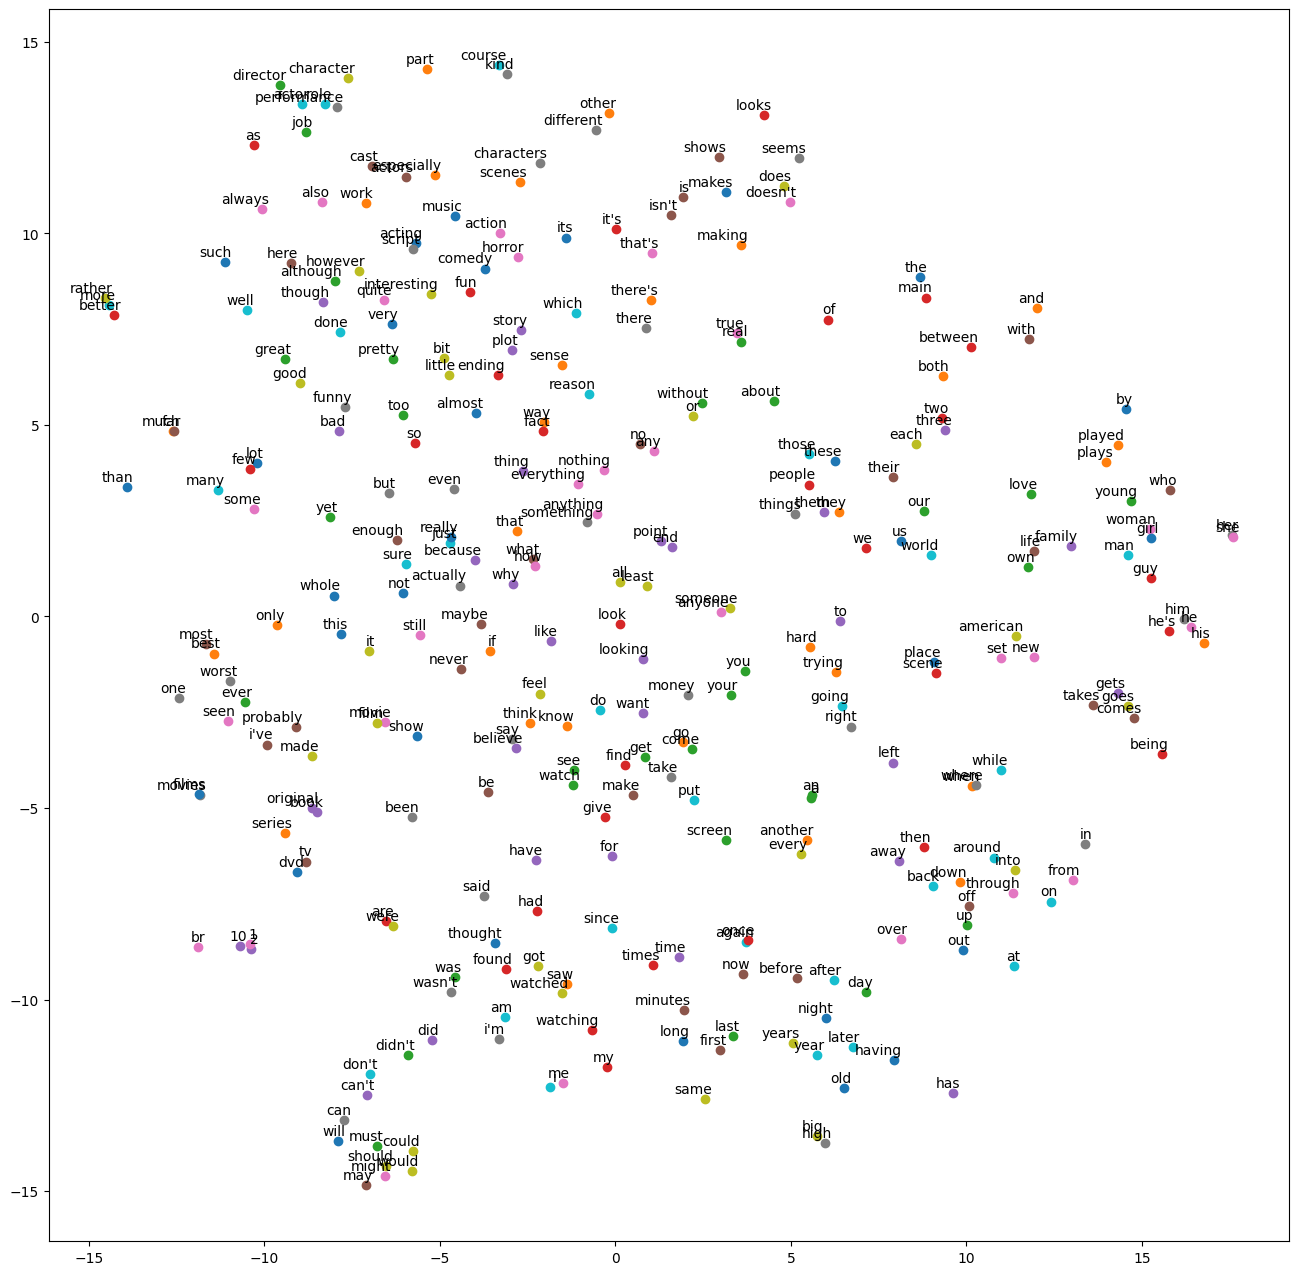

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DejaVu Sans'
def tsne_plot(model):
    # Extract vocabulary
    vocab = list(model.wv.index_to_key)[:300]

    # Prepare data for t-SNE
    labels = []
    tokens = []

    for word in vocab:
        tokens.append(model.wv[word])
        labels.append(word)

    tokens = np.array(tokens)

    # Perform t-SNE
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = new_values[:, 0]
    y = new_values[:, 1]

    # Plot the t-SNE visualization
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

# Visualize word embeddings for business descriptions
tsne_plot(word2vec_model)


In [ ]:
def sentence_to_vector(sentence):
    #words = sentence.split()
    word_vectors = [word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv]
    if len(word_vectors) == 0:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word_vectors, axis=0)

# Vectorize each sentence in the DataFrame
df['sentence_vector'] = df['comment'].apply(sentence_to_vector)

Model

In [ ]:
def get_sentiment(score):
    if score >3:
        return "positive"
    if score==3:
      return 'neutral'



    else:
        return "negative"

# Example usage:
# Assuming you have a DataFrame named 'new_df' and want to apply the function to the 'score' column
data['sentiment'] = data['score'].apply(get_sentiment)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Example: Assuming you have a DataFrame with 'sentence_vector' and 'sentiment_label'
X = np.stack(data['sentence_vector'])  # Convert list of vectors to a 2D array
y = data['sentiment']  # Your sentiment labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
sentiment_classifier = LogisticRegression()
sentiment_classifier.fit(X_train, y_train)

# Optionally, evaluate the classifier
from sklearn.metrics import accuracy_score
y_pred = sentiment_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8357400722021661


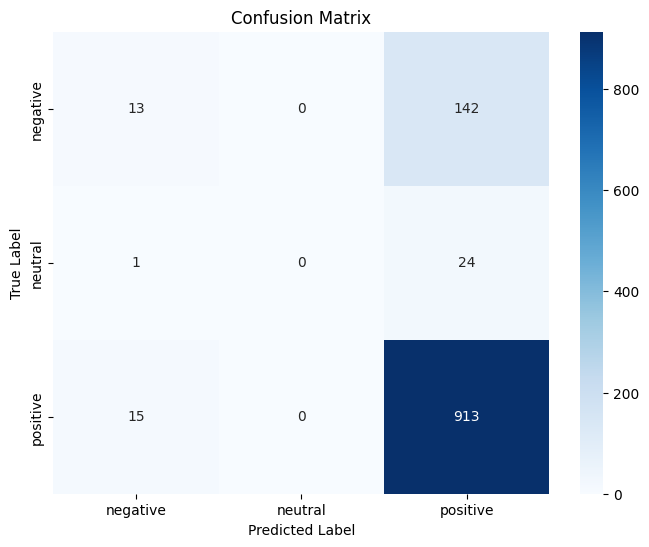

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = sentiment_classifier.classes_

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Visualization embeddings with Tensorboard

In [ ]:
#tensorboard --logdir=C:\Users\meama\Documents\A5\AAI_Machine_Learning_for_NLP\Project2\logs

import tensorflow as tf
from tensorboard.plugins import projector
import gensim

#word2vec_model = gensim.models.Word2Vec.load(r"C:\Users\meama\Documents\A5\AAI_Machine_Learning_for_NLP\word2vec.model")  # Update with the actual path

# Now, using 'word2vec_model' instead of 'model' to avoid confusion
vocab = list(word2vec_model.wv.index_to_key)[:500]
embeddings = np.array([word2vec_model.wv[word] for word in vocab])

# Set up the log directory
log_dir = r"\embeddings2"

# Define a Keras model with the Embedding layer
embedding_layer = tf.keras.layers.Embedding(
    input_dim=len(vocab),
    output_dim=embeddings.shape[1],
    embeddings_initializer=tf.constant_initializer(embeddings),
    trainable=False
)

# You need to create a dummy model to save the embedding layer's weights
model = tf.keras.Sequential([embedding_layer])

# Call the model with a dummy input to build it
model(tf.constant([[0]]))

# Save the model's weights
model.save_weights(os.path.join(log_dir, 'embedding_layer_weights.ckpt'))

# Write the metadata for the projector
metadata_path = os.path.join(log_dir, 'metadata.tsv')
with open(metadata_path, 'w', encoding='utf-8') as metadata_file:
    for word in vocab:
        metadata_file.write(f"{word}\n")

# Set up the projector config
config = projector.ProjectorConfig()
embedding_config = config.embeddings.add()
embedding_config.tensor_name = 'embedding/.ATTRIBUTES/VARIABLE_VALUE'
embedding_config.metadata_path = 'metadata.tsv'

# Save the projector config
projector.visualize_embeddings(log_dir, config)


### Grade Prediction

In this section, we wil try to predict the score given for a review.

#### TF-IDF & Classical Model

In [ ]:

nltk.download('words')
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
!pip install stopwords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df=pd.read_csv("/content/df_new_format_trad.csv",sep=",")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name  \
0  American Handyman in Paris   
1  American Handyman in Paris   
2  American Handyman in Paris   
3  American Handyman in Paris   
4  American Handyman in Paris   

                                                link  \
0  https://www.yelp.fr/biz/american-handyman-in-p...   
1  https://www.yelp.fr/biz/american-handyman-in-p...   
2  https://www.yelp.fr/biz/american-handyman-in-p...   
3  https://www.yelp.fr/biz/american-handyman-in-p...   
4  https://www.yelp.fr/biz/american-handyman-in-p...   

                                         description  average_score  \
0  Petits travaux à domicile Électricien Plombier...            5.0   
1  Petits travaux à domicile Électricien Plombier...            5.0   
2  Petits travaux à domicile Électricien Plombier...            5.0   
3  Petits travaux à domicile Électricien Plombier...            5.0   
4  Petits travaux à domicile Électricien Plombier...            5.0   

   number_votes                                            comment  score  \
0             6  When you are in the US and your problem is in ...    5.0   
1             6  If you are wondering if you should call him, I...    5.0   
2             6  Have had multiple plumbing issues in my apartm...    5.0   
3             6  Very efficient and quick! Maxim responded to m...    5.0   
4             6  We had furniture delivered when we moved to Pa...    5.0   

                        email    phone_number     location language  \
0  americanhandymaninparis.fr  06 12 32 04 39  no location       en   
1  americanhandymaninparis.fr  06 12 32 04 39  no location       en   
2  americanhandymaninparis.fr  06 12 32 04 39  no location       en   
3  americanhandymaninparis.fr  06 12 32 04 39  no location       en   
4  americanhandymaninparis.fr  06 12 32 04 39  no location       en   

  language_com2                                   description_trad  
0            en  Small home jobs Electrician Plumber Appliance ...  
1            en  Small home jobs Electrician Plumber Appliance ...  
2            en  Small home jobs Electrician Plumber Appliance ...  
3            en  Small home jobs Electrician Plumber Appliance ...  
4            en  Small home jobs Electrician Plumber Appliance ...

In [ ]:
df['score'].value_counts() # we have a unbalanced dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


score
5.0    4145
1.0     777
4.0     380
3.0     125
2.0      99
Name: count, dtype: int64

In [ ]:
df['score'].mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4.269815418023887

**Pre process**

In [ ]:
df = df.dropna(subset=['score'])

In [ ]:
df = df.dropna(subset=['comment'])
df=df[df['comment'] != ""] # we remove empty comments

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

# Create a set of valid English words from the NLTK words corpus
english_words = set(words.words())

# Apply the function to the "comment" column
df = df[df['comment'].apply(lambda x: any(word in english_words for word in x.lower().split()))] # we drop rows where there are no comprehensive words

In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5521, 13)

In [ ]:
df['language_com2'].value_counts() # we have 1 comment detected as french, italien and pt. Lets have a look at it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


language_com2
en    5518
fr       1
it       1
pt       1
Name: count, dtype: int64

In [ ]:
df[df['language_com2']=='pt']['comment'] # after looking at those rows, we can see that the model did not correctly labeled them as english

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5914    Professional, no problem.
Name: comment, dtype: object

In [ ]:
# Assuming you have a DataFrame df with a 'comment' column
df['comment_clean_punct'] = df['comment'].apply(lambda x: re.sub(r'[^\w\s]|_', '', x))  # Removes punctuation

# Remove emojis
df['comment_clean_punct'] = df['comment_clean_punct'].apply(lambda x: x.encode('ascii', 'ignore').decode('utf-8'))

# Remove numbers
df['comment_clean_punct'] = df['comment_clean_punct'].apply(lambda x: re.sub(r'\d', '', x))

# Replace consecutive spaces with a single space
df['comment_clean_punct'] = df['comment_clean_punct'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Convert to lowercase
df['comment_clean_punct'] = df['comment_clean_punct'].str.lower()

df['comment_clean_punct_stop'] = df['comment_clean_punct'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [ ]:
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['comment_clean_punct_stop_lem'] = [lemmatizer.lemmatize(row) for row in df['comment_clean_punct_stop']]
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


name  \
0  American Handyman in Paris   
1  American Handyman in Paris   
2  American Handyman in Paris   
3  American Handyman in Paris   
4  American Handyman in Paris   

                                                link  \
0  https://www.yelp.fr/biz/american-handyman-in-p...   
1  https://www.yelp.fr/biz/american-handyman-in-p...   
2  https://www.yelp.fr/biz/american-handyman-in-p...   
3  https://www.yelp.fr/biz/american-handyman-in-p...   
4  https://www.yelp.fr/biz/american-handyman-in-p...   

                                         description  average_score  \
0  Petits travaux à domicile Électricien Plombier...            5.0   
1  Petits travaux à domicile Électricien Plombier...            5.0   
2  Petits travaux à domicile Électricien Plombier...            5.0   
3  Petits travaux à domicile Électricien Plombier...            5.0   
4  Petits travaux à domicile Électricien Plombier...            5.0   

   number_votes                                            comment  score  \
0             6  When you are in the US and your problem is in ...    5.0   
1             6  If you are wondering if you should call him, I...    5.0   
2             6  Have had multiple plumbing issues in my apartm...    5.0   
3             6  Very efficient and quick! Maxim responded to m...    5.0   
4             6  We had furniture delivered when we moved to Pa...    5.0   

                        email    phone_number     location  ... language_com2  \
0  americanhandymaninparis.fr  06 12 32 04 39  no location  ...            en   
1  americanhandymaninparis.fr  06 12 32 04 39  no location  ...            en   
2  americanhandymaninparis.fr  06 12 32 04 39  no location  ...            en   
3  americanhandymaninparis.fr  06 12 32 04 39  no location  ...            en   
4  americanhandymaninparis.fr  06 12 32 04 39  no location  ...            en   

                                    description_trad sentiment  \
0  Small home jobs Electrician Plumber Appliance ...  positive   
1  Small home jobs Electrician Plumber Appliance ...  positive   
2  Small home jobs Electrician Plumber Appliance ...  positive   
3  Small home jobs Electrician Plumber Appliance ...  positive   
4  Small home jobs Electrician Plumber Appliance ...  positive   

                                prediction_sentiment  \
0  [[{'label': 'positive', 'score': 0.91841322183...   
1  [[{'label': 'positive', 'score': 0.86877918243...   
2  [[{'label': 'positive', 'score': 0.75329613685...   
3  [[{'label': 'positive', 'score': 0.73464620113...   
4  [[{'label': 'positive', 'score': 0.57818245887...   

  predicted_sentiment_label  len  \
0                  positive  311   
1                  positive  545   
2                  positive  316   
3                  positive  416   
4                  positive  203   

                                 comment_clean_punct  \
0  when you are in the us and your problem is in ...   
1  if you are wondering if you should call him i ...   
2  have had multiple plumbing issues in my apartm...   
3  very efficient and quick maxim responded to me...   
4  we had furniture delivered when we moved to pa...   

                            comment_clean_punct_stop  \
0  us problem paris france real shot dark find so...   
1  wondering call say emphatic yes best find pari...   
2  multiple plumbing issues apartment would insta...   
3  efficient quick maxim responded almost immedia...   
4  furniture delivered moved paris work embassy t...   

                        comment_clean_punct_stop_lem max_sentiment_score  
0  us problem paris france real shot dark find so...            0.918413  
1  wondering call say emphatic yes best find pari...            0.868779  
2  multiple plumbing issues apartment would insta...            0.753296  
3  efficient quick maxim responded almost immedia...            0.734646  
4  furniture delivered moved paris work embassy t...            0.578182  

[5 rows x 21 columns]

**Feature Engineering**

We add few features such as :

*   lenght of each review
*   sentiment
*   sentiement probability






In [ ]:
df['len'] = df['comment'].apply(len)

In [ ]:
from transformers import pipeline

classification = pipeline(
    task="sentiment-analysis",
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student",
    return_all_scores=True
)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:58: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  distutils.version.LooseVersion(required_tensorflow_version)):
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate wi

config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
df['prediction_sentiment'] = df['comment'].apply(lambda x: classification(x[:512]))

In [ ]:
# Extract features from the sentiment analysis results
df['max_sentiment_score'] = df['prediction_sentiment'].apply(lambda x: max(score['score'] for score in x[0]))
df['predicted_sentiment_label'] = df['prediction_sentiment'].apply(lambda x: max(x[0], key=lambda score: score['score'])['label'])

In [ ]:
df.head()

name  \
0  American Handyman in Paris   
1  American Handyman in Paris   
2  American Handyman in Paris   
3  American Handyman in Paris   
4  American Handyman in Paris   

                                                link  \
0  https://www.yelp.fr/biz/american-handyman-in-p...   
1  https://www.yelp.fr/biz/american-handyman-in-p...   
2  https://www.yelp.fr/biz/american-handyman-in-p...   
3  https://www.yelp.fr/biz/american-handyman-in-p...   
4  https://www.yelp.fr/biz/american-handyman-in-p...   

                                         description  average_score  \
0  Petits travaux à domicile Électricien Plombier...            5.0   
1  Petits travaux à domicile Électricien Plombier...            5.0   
2  Petits travaux à domicile Électricien Plombier...            5.0   
3  Petits travaux à domicile Électricien Plombier...            5.0   
4  Petits travaux à domicile Électricien Plombier...            5.0   

   number_votes                                            comment  score  \
0             6  When you are in the US and your problem is in ...    5.0   
1             6  If you are wondering if you should call him, I...    5.0   
2             6  Have had multiple plumbing issues in my apartm...    5.0   
3             6  Very efficient and quick! Maxim responded to m...    5.0   
4             6  We had furniture delivered when we moved to Pa...    5.0   

                        email    phone_number     location  ... language_com2  \
0  americanhandymaninparis.fr  06 12 32 04 39  no location  ...            en   
1  americanhandymaninparis.fr  06 12 32 04 39  no location  ...            en   
2  americanhandymaninparis.fr  06 12 32 04 39  no location  ...            en   
3  americanhandymaninparis.fr  06 12 32 04 39  no location  ...            en   
4  americanhandymaninparis.fr  06 12 32 04 39  no location  ...            en   

                                    description_trad sentiment  \
0  Small home jobs Electrician Plumber Appliance ...  positive   
1  Small home jobs Electrician Plumber Appliance ...  positive   
2  Small home jobs Electrician Plumber Appliance ...  positive   
3  Small home jobs Electrician Plumber Appliance ...  positive   
4  Small home jobs Electrician Plumber Appliance ...  positive   

                                prediction_sentiment  \
0  [[{'label': 'positive', 'score': 0.91841322183...   
1  [[{'label': 'positive', 'score': 0.86877918243...   
2  [[{'label': 'positive', 'score': 0.75329613685...   
3  [[{'label': 'positive', 'score': 0.73464620113...   
4  [[{'label': 'positive', 'score': 0.57818245887...   

  predicted_sentiment_label  len  \
0                  positive  311   
1                  positive  545   
2                  positive  316   
3                  positive  416   
4                  positive  203   

                                 comment_clean_punct  \
0  when you are in the us and your problem is in ...   
1  if you are wondering if you should call him i ...   
2  have had multiple plumbing issues in my apartm...   
3  very efficient and quick maxim responded to me...   
4  we had furniture delivered when we moved to pa...   

                            comment_clean_punct_stop  \
0  us problem paris france real shot dark find so...   
1  wondering call say emphatic yes best find pari...   
2  multiple plumbing issues apartment would insta...   
3  efficient quick maxim responded almost immedia...   
4  furniture delivered moved paris work embassy t...   

                        comment_clean_punct_stop_lem max_sentiment_score  
0  us problem paris france real shot dark find so...            0.918413  
1  wondering call say emphatic yes best find pari...            0.868779  
2  multiple plumbing issues apartment would insta...            0.753296  
3  efficient quick maxim responded almost immedia...            0.734646  
4  furniture delivered moved paris work embassy t...            0.578182  

[5 rows x 21 columns]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
import warnings

# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Step 1: Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df[['comment_clean_punct_stop_lem', 'len', 'max_sentiment_score', 'predicted_sentiment_label']],
    df['score'],
    test_size=0.2,
    random_state=42
)

# Step 2: Resample the training data to address class imbalance
oversampler = RandomOverSampler(random_state=42)
train_data_resampled, train_labels_resampled = oversampler.fit_resample(train_data, train_labels)

# Step 3: Create a pipeline with TF-IDF vectorizer and SVM classifier
model = make_pipeline(TfidfVectorizer(), SVC())

# Step 4: Train the model on the resampled data
model.fit(train_data_resampled['comment_clean_punct_stop_lem'], train_labels_resampled)

# Step 5: Make predictions on the test set
predictions = model.predict(test_data['comment_clean_punct_stop_lem'])

# Step 6: Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.2f}")

# classification report for more detailed evaluation
print("Classification Report:\n", classification_report(test_labels, predictions))

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

         1.0       0.85      0.74      0.79       147
         2.0       0.00      0.00      0.00        16
         3.0       0.00      0.00      0.00        29
         4.0       0.17      0.01      0.03        69
         5.0       0.85      0.98      0.91       844

    accuracy                           0.85      1105
   macro avg       0.37      0.35      0.35      1105
weighted avg       0.78      0.85      0.81      1105



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


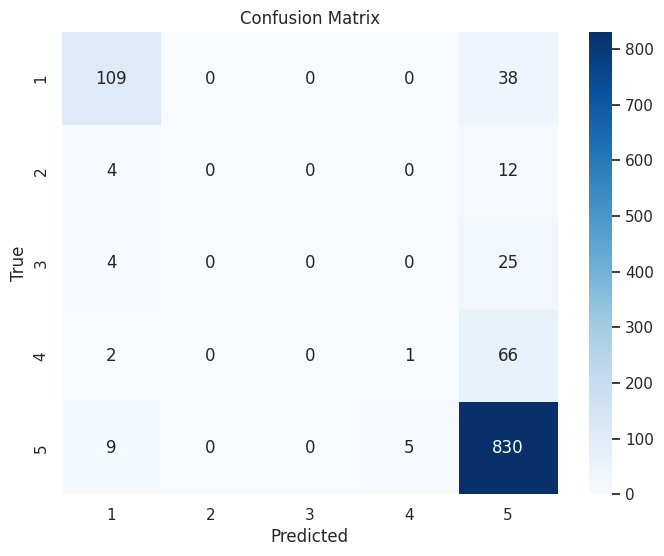

In [ ]:
from sklearn.metrics import confusion_matrix

# Step 7: Visualize the results


# Confusion Matrix
cm = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


We have an accuracy of 85%, however this dataset is imbalanced. Even with the resample step,  we can see that the model find easily extreme score, but is very weak to inbetween scores such as 2/3/4 stars

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
import warnings

# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Step 1: Combine features and labels
X = df[['comment_clean_punct_stop_lem', 'len', 'predicted_sentiment_label']]
y = df['score']

# Step 2: Resample the entire dataset to address class imbalance
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Step 3: Split the resampled data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.2,
    random_state=42
)

# Step 4: Create a pipeline with TF-IDF vectorizer and SVM classifier
model = make_pipeline(TfidfVectorizer(), SVC())

# Step 5: Train the model on the resampled data
model.fit(train_data['comment_clean_punct_stop_lem'], train_labels)

# Step 6: Make predictions on the test set
predictions = model.predict(test_data['comment_clean_punct_stop_lem'])

# Step 7: Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Classification report for more detailed evaluation
print("Classification Report:\n", classification_report(test_labels, predictions))


Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       840
         2.0       1.00      1.00      1.00       804
         3.0       1.00      1.00      1.00       865
         4.0       1.00      1.00      1.00       853
         5.0       0.99      0.97      0.98       783

    accuracy                           0.99      4145
   macro avg       0.99      0.99      0.99      4145
weighted avg       0.99      0.99      0.99      4145



#### Basic Model with an embedding Layer

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Embedding, Flatten, Dense, Input, Concatenate
from keras.optimizers import Adam

# Assuming your DataFrame is named df
# You can replace df with the actual name of your DataFrame

# Step 1: Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df[['comment_clean_punct_stop_lem', 'len', 'max_sentiment_score', 'predicted_sentiment_label']],
    df['score'],
    test_size=0.2,
    random_state=42
)

# Step 2: Tokenize the comments
max_words = 10000  # Adjust based on your vocabulary size
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data['comment_clean_punct_stop_lem'])

# Step 3: Convert text to sequences and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_data['comment_clean_punct_stop_lem'])
test_sequences = tokenizer.texts_to_sequences(test_data['comment_clean_punct_stop_lem'])

max_sequence_length = 4621  # Adjust based on your maximum sequence length
train_data_padded = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_data_padded = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Step 4: Encode the labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Step 5: Additional features
train_additional_features = train_data[['len', 'max_sentiment_score']].values
test_additional_features = test_data[['len', 'max_sentiment_score']].values

# Step 6: Build the model with an embedding layer and additional features
embedding_dim = 100 # Adjust based on your embedding dimension

# Text input branch
text_input = Input(shape=(max_sequence_length,))
text_embedding = Embedding(input_dim=max_words, output_dim=embedding_dim)(text_input)
text_flatten = Flatten()(text_embedding)

# Additional features input branch
additional_input = Input(shape=(2,))
additional_dense = Dense(32, activation='relu')(additional_input)
additional_flatten = Flatten()(additional_dense)

# Concatenate both branches
combined_input = Concatenate()([text_flatten, additional_flatten])

# Dense layer for classification
output = Dense(5, activation='softmax')(combined_input)

# Create the model
model = Model(inputs=[text_input, additional_input], outputs=output)

# Step 7: Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 8: Train the model
model.fit([train_data_padded, train_additional_features], train_labels_encoded, epochs=10, batch_size=64, validation_split=0.2)

# Step 9: Evaluate the model
accuracy = model.evaluate([test_data_padded, test_additional_features], test_labels_encoded)[1]
print(f"Accuracy: {accuracy:.2f}")

Epoch 1/10
56/56 [==============================] - 33s 541ms/step - loss: 2.1256 - accuracy: 0.6846 - val_loss: 0.8973 - val_accuracy: 0.7545
Epoch 2/10
56/56 [==============================] - 28s 496ms/step - loss: 0.6902 - accuracy: 0.7913 - val_loss: 0.6139 - val_accuracy: 0.8190
Epoch 3/10
56/56 [==============================] - 40s 728ms/step - loss: 0.4966 - accuracy: 0.8516 - val_loss: 0.5779 - val_accuracy: 0.8348
Epoch 4/10
56/56 [==============================] - 31s 552ms/step - loss: 0.3716 - accuracy: 0.8828 - val_loss: 0.5951 - val_accuracy: 0.8541
Epoch 5/10
56/56 [==============================] - 34s 604ms/step - loss: 0.2723 - accuracy: 0.9148 - val_loss: 0.5632 - val_accuracy: 0.8495
Epoch 6/10
56/56 [==============================] - 33s 593ms/step - loss: 0.1872 - accuracy: 0.9488 - val_loss: 0.5671 - val_accuracy: 0.8495
Epoch 7/10
56/56 [==============================] - 30s 531ms/step - loss: 0.1347 - accuracy: 0.9652 - val_loss: 0.5889 - val_accuracy: 0.8484

In [ ]:
# Step 9: Evaluate the model
predictions = model.predict([test_data_padded, test_additional_features])
predicted_labels = predictions.argmax(axis=1)

# Classification Report
report = classification_report(test_labels_encoded, predicted_labels)
print("Classification Report:")
print(report)

35/35 [==============================] - 5s 127ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       147
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        29
           3       0.00      0.00      0.00        69
           4       0.86      0.97      0.91       844

    accuracy                           0.84      1105
   macro avg       0.32      0.34      0.33      1105
weighted avg       0.75      0.84      0.79      1105



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we plot the classification report, we can see that the model has correctly classified 72% and 86 % for the class 1 and 5. But it did not predict any instance of the other class. We need more data for the minority class, or try some other resample technique.

#### Basic model with embedding layer test 2

In [ ]:
import numpy as np

embedding_dim = 60  # Replace with the dimension of your Word2Vec vectors
vocab_size = 10000  # Adjust based on your vocabulary size

# Initialize the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Fill the embedding matrix with the vectors from your Word2Vec model
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = word2vec_model.wv[word] if word in word2vec_model.wv else None
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Embedding, Flatten, Dense, Input, Concatenate, Dropout
from keras.optimizers import Adam, SGD
from keras.regularizers import l1_l2

# Text input branch
text_input = Input(shape=(4621,))
text_embedding = Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           weights=[embedding_matrix],
                           trainable=False)(text_input)  # Set trainable to True if you want to fine-tune the embeddings
text_flatten = Flatten()(text_embedding)
#text_dropout = Dropout(0.2)(text_flatten)

# Additional features input branch
additional_input = Input(shape=(2,))
#regularizer = l1_l2(l1=0.01, l2=0.01)
additional_dense = Dense(16, activation='relu')(additional_input)
#regularizer = l1_l2(l1=0.01, l2=0.01)  # Adjust the regularization factors
additional_dense = Dense(16, activation='relu', kernel_regularizer=regularizer)(additional_input)
additional_flatten = Flatten()(additional_dense)

# Concatenate both branches
combined_input = Concatenate()([text_flatten, additional_flatten])

# Dense layer for classification
output = Dense(5, activation='softmax')(combined_input)  # Assuming 5 classes (1 to 5)

# Create the model
model = Model(inputs=[text_input, additional_input], outputs=output)

# Step 7: Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Embedding, Flatten, Dense, Input, Concatenate
from keras.optimizers import Adam

# Assuming your DataFrame is named df
# You can replace df with the actual name of your DataFrame

# Step 1: Split the data into training and testing sets
"""train_data, test_data, train_labels, test_labels = train_test_split(
    df_no_neg[['comment_clean_punct_stop', 'len', 'max_sentiment_score', 'predicted_sentiment_label']],
    df_no_neg['score'],
    test_size=0.8,
    random_state=42
)"""
from sklearn.model_selection import train_test_split
import pandas as pd

# Create bins for 'max_sentiment_score'
"""df_no_neg['sentiment_score_bins'] = pd.qcut(df_no_neg['max_sentiment_score'], q=4, duplicates='drop')

# Perform stratified split based on these bins
train_data, test_data, train_labels, test_labels = train_test_split(
    df_no_neg[['comment_clean_punct_stop', 'len', 'max_sentiment_score', 'predicted_sentiment_label']],
    df_no_neg['score'],
    test_size=0.9,
    random_state=42,
    stratify=df_no_neg['sentiment_score_bins']  # Stratify based on the bins
)"""
train_data, test_data, train_labels, test_labels = train_test_split(
    df_no_neg[['comment_clean_punct_stop', 'len', 'max_sentiment_score', 'predicted_sentiment_label']],
    df_no_neg['score'],
    test_size=0.95,
    random_state=42,
    stratify=df_no_neg['score']  # Stratify based on the 'score'
)

# Optionally, drop the bin column if no longer needed
train_data.drop(['sentiment_score_bins'], axis=1, inplace=True, errors='ignore')
test_data.drop(['sentiment_score_bins'], axis=1, inplace=True, errors='ignore')


# Step 2: Tokenize the comments
max_words = 10000  # Adjust based on your vocabulary size
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data['comment_clean_punct_stop'])

# Step 3: Convert text to sequences and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_data['comment_clean_punct_stop'])
test_sequences = tokenizer.texts_to_sequences(test_data['comment_clean_punct_stop'])

max_sequence_length = 4621  # Adjust based on your maximum sequence length
train_data_padded = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_data_padded = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Step 4: Encode the labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Step 5: Additional features
train_additional_features = train_data[['len', 'max_sentiment_score']].values
test_additional_features = test_data[['len', 'max_sentiment_score']].values

In [ ]:


# Step 8: Train the model
history=model.fit([train_data_padded, train_additional_features], train_labels_encoded, epochs=50, batch_size=64, validation_split=0.2)

# Step 9: Evaluate the model
accuracy = model.evaluate([test_data_padded, test_additional_features], test_labels_encoded)[1]
print(f"Accuracy: {accuracy:.2f}")

## 8. Question Answering

This part shows the algorithm behind our chatbot in the streamlit app. We use a combination of Tf-idf and question-answering model from hugging face, to make the model answer our question from our own data.

First as the user ask a question, we compute a td-idf and cosine similarity to see the most relevant information. Then those information are stocked into a variable as the contexte for question-answering pipeline. Using the context, the model is capable to answer basic and simple question.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
df=pd.read_csv("/content/df_mergedV4.csv",sep=',')

In [ ]:
df.head()

Unnamed: 0                         name  \
0           0   American Handyman in Paris   
1           1        Les Clés du Bricolage   
2           2  Maison travaux & rénovation   
3           3                Except Design   
4           4              Le Mari à Louer   

                                                link  \
0  https://www.yelp.fr/biz/american-handyman-in-p...   
1  https://www.yelp.fr/biz/les-cl%C3%A9s-du-brico...   
2  https://www.yelp.fr/biz/maison-travaux-et-r%C3...   
3  https://www.yelp.fr/biz/except-design-paris?os...   
4  https://www.yelp.fr/biz/le-mari-%C3%A0-louer-p...   

                                         description  average_score  \
0  Petits travaux à domicile Électricien Plombier...            5.0   
1  Petits travaux à domicile Design d’intérieur R...            5.0   
2   Maison Travaux & Rénovation est un acteur loc...           -1.0   
3  Design d’intérieur  Except Design est un colle...            5.0   
4                              General Contractors              4.3   

   number_votes                                           comments  \
0             6  {'When you are in the US and your problem is i...   
1             2  {"04/03/2013\nUn concept génial ! une mise en ...   
2            -1                                                 {}   
3             1  {'13/04/2015\nService vraiment excellent': '4....   
4             3                                                 {}   

                          email     phone_number  \
0    americanhandymaninparis.fr   06 12 32 04 39   
1         lesclesdubricolage.fr   01 75 77 87 39   
2  maison-travaux-renovation.co   06 48 99 40 03   
3              exceptdesign.com   06 50 81 36 05   
4       lemarialouer.fr/q-e.htm  no phone number   

                                          location  \
0                                      no location   
1                27 rue du Chemin Vert 75011 Paris   
2                 64 rue servandoni 33000 Bordeaux   
3  12 bis rue Robert et Sonia Delaunay 75011 Paris   
4                                      no location   

                                       comments_dict  \
0  {'When you are in the US and your problem is i...   
1  {"04/03/2013\nUn concept génial ! une mise en ...   
2                                                 {}   
3  {'13/04/2015\nService vraiment excellent': '4....   
4                                                 {}   

                                 comments_dict_clean  \
0  {'When you are in the US and your problem is i...   
1  {" Un concept génial ! une mise en pratique à ...   
2                                                 {}   
3  {' Service vraiment excellent': '4', " Si vous...   
4                                                 {}   

                                   description_clean  \
0  Petits travaux à domicile Électricien Plombier...   
1  Petits travaux à domicile Design d’intérieur R...   
2   Maison Travaux & Rénovation est un acteur loc...   
3  Design d’intérieur  Except Design est un colle...   
4                              General Contractors     

                            comments_dict_trad_clean  \
0  {'When you are in the US and your problem is i...   
1  {'A brilliant concept! a practical application...   
2                                                 {}   
3  {'Truly excellent service': '4', "If you love ...   
4                                                 {}   

                              description_trad_clean  
0  Small home jobs Electrician Plumber Appliance ...  
1  Small jobs at home Interior design Flooring Up...  
2  Maison Travaux & Rénovation is a local player ...  
3  Interior design Except Design is a collective ...  
4                                General Contractors

In [ ]:
def get_tfidf_vectorizer(description):
    # Create a TF-IDF vectorizer with specific settings
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    return tfidf_vectorizer.fit(description)

# Retrieve the TF-IDF vectorizer, cached for efficiency
tfidf_vectorizer = get_tfidf_vectorizer(df['description_trad_clean'])

def retrieve_top_documents(query_summary, k=10):
    # Transform the query summary into a TF-IDF vector
    query_vector = tfidf_vectorizer.transform([query_summary])

    # Calculate cosine similarity between the query and all articles
    similarity_scores = linear_kernel(query_vector, tfidf_vectorizer.transform(df['description_trad_clean']))

    # Sort document indices by similarity score in descending order
    document_indices = similarity_scores[0].argsort()[:-k-1:-1]

    # Retrieve the top-k documents based on their indices
    top_documents = df.iloc[document_indices]

    return similarity_scores, top_documents

# Example usage:
query_summary = "can you give the name of a company to dog sit my dog"
k = 10
similarity_scores, top_documents = retrieve_top_documents(query_summary, k)

# Display the top documents
top_documents

Unnamed: 0                              name  \
1733        1733                       DirectBrico   
940          940              Groupe sav de france   
1747        1747                    VB Real Estate   
821          821                             Pioui   
345          345                             Pioui   
733          733                   Verisure France   
906          906                  Carrelage Palais   
771          771              viveonis-boutique.fr   
1042        1042              Entreprise Seurindeo   
781          781  CAPTAIN REPAIR (MOZ-RÉPARATIONS)   

                                                   link  \
1733  https://fr.trustpilot.com/review/vendremonmobi...   
940   https://fr.trustpilot.com/review/groupesavdefr...   
1747  https://fr.trustpilot.com/review/moncoinpriere...   
821      https://fr.trustpilot.com/review/www.pioui.com   
345      https://fr.trustpilot.com/review/www.pioui.com   
733        https://fr.trustpilot.com/review/verisure.fr   
906   https://fr.trustpilot.com/review/carrelagepala...   
771   https://fr.trustpilot.com/review/viveonis-bout...   
1042  https://fr.trustpilot.com/review/entreprise-se...   
781   https://fr.trustpilot.com/review/www.mobileonz...   

                                            description  average_score  \
1733  Vous voulez savoir QUI RACHETE VOTRE TELEPHONE...            3.7   
940   Un grand nombre de services et de travaux réal...            4.0   
1747  Mon Coin Prière, la boutique n°1 de vente d’ac...            3.6   
821   Service de reclamation client gratuit Un seul ...            4.4   
345   Service de reclamation client gratuit Un seul ...            4.4   
733   Verisure est votre spécialiste de l'alarme con...            4.1   
906   Professionnels du bâtiment effectuent des trav...            4.1   
771   Vos commandes prêtes dans l'heure en magasin. ...            4.7   
1042  Que soyez à Pessac ou à Talence ou encore dans...            3.6   
781   MOZ-Réparations est le spécialiste de la prest...            4.7   

      number_votes                                           comments  \
1733             1                                                 {}   
940              3                                                 {}   
1747            58                                                 {}   
821           1735  {'Belle expérience !': '5', 'Ma demande a bien...   
345           1798  {'parfait tout est très bien expliqué par le c...   
733          22539  {'Tout fonctionne bien, commercial ( Mickaël )...   
906              5  {"Très belle prestation pour notre salle d'eau...   
771            583                                                 {}   
1042             4  {"évitez l l'entreprise Invert'air entretien d...   
781             29  {'Accueil - services - conseils "MOZ" est tout...   

                              email     phone_number  \
1733    contact@vendremonmobile.com       0767430766   
940   contact@groupesavdefrance.com       0971077119   
1747      contact@moncoinpriere.com  no phone number   
821                        no email  no phone number   
345                        no email  no phone number   
733                        no email  no phone number   
906      contact@carrelagepalais.fr       0618998740   
771            boutique@viveonis.fr       0467755410   
1042                       no email  no phone number   
781      contact@mobileonzesite.com       0650486355   

                                               location  \
1733  1465 Route du Gagnoulat, 46250, Goujounac, France   
940              18/26 rue goubet, 75019, Paris, France   
1747                                             France   
821   Pioui Bureau 562-78 avenue des Champs-Élysées,...   
345   Pioui Bureau 562-78 avenue des Champs-Élysées,...   
733   1 Place du Général de Gaulle, 92160, Antony, F...   
906   PLACE JEAN JAURES, 77130, ST GERAMAIN LAVAL, F...   
771   280 avenue des compagnons, 34170, Castelnau-le.

In [ ]:
# Create a context string for each unique name value
unique_names = top_documents["name"].unique()

contexts = []
for name in unique_names:
    subset_df = df[df["name"] == name]
    avg_score = subset_df["average_score"].mean()
    description=subset_df['description_trad_clean'].iloc[0]
    phone_number = subset_df["phone_number"].iloc[0]  # Assuming it's the same for each entry
    context_string = f" The Name of the company is: {name},  {name}'s Description is: {description} {name}'s Average Score is: {avg_score} and {name}'s Phone Number is: {phone_number}"
    contexts.append(context_string)

# Now, 'contexts' is a list where each element is a single context string for each unique name.
print(contexts)

[" The Name of the company is: Monsieur Hardi,  Monsieur Hardi's Description is: Dog cushions and dog transport bags Made in France. Quality, designer, indestructible and comfortable dog accessories! Monsieur Hardi's Average Score is: 3.7 and Monsieur Hardi's Phone Number is: no phone number", " The Name of the company is: Esprit Dog,  Esprit Dog's Description is: Educate your dog with our online training Esprit Dog Puppy The best training to educate your puppy. The only training in the world shot with a puppy in real time! Esprit Dog Family The essential training for training your dog. The Esprit Dog Family method gives you all the education and training tools used by the best professionals. Esprit Dog Senior Online training to keep your old dog in good health! Esprit Dog Senior gives you all the advice to increase the life expectancy of all dog breeds! Aggressive Dog Online training for all aggressive dogs or to prevent them from becoming so! Esprit Dog Aggressive Dog is a complete t

In [ ]:
context_string = '\n'.join(contexts)

In [ ]:
from transformers import pipeline

# create pieline for QA
qa = pipeline('question-answering')
user_question = "can you give the name of a company to dog sit my dog"
answer = qa(context=context_string, question=user_question)
print(answer)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.5138688683509827, 'start': 6685, 'end': 6692, 'answer': 'Canineo'}
